# Importing packages

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
from scipy.stats import (beta as beta_dist, halfnorm, lognorm, uniform, norm, truncnorm, 
                         rv_continuous, expon, multivariate_normal)

# set a random seed for the rest of the notebook, for reproducibility purposes
np.random.seed(40)

# formatting graphs
# set default figure size
plt.rcParams['figure.figsize'] = (10, 6)
# increasing font sizes
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.titlesize'] = 16  
plt.rcParams['axes.labelsize'] = 14 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 14 
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6


# Defining functions to be used

In [98]:
# define SIR model function
def sir_model(SIR, t, beta, gamma):
    S, I, R = SIR
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]


# given some values for beta and gamma, and some initial conditions, simulates the
# SIR values for the each time point in t_values
def simulate_sir(beta, gamma, S_init, I_init, R_init, t_values):
    SIR_init = [S_init, I_init, R_init]
    solution = odeint(sir_model, SIR_init, t_values, args=(beta, gamma))
    S, I, R = solution.T
    return S, I, R


# calculates the log-likelihood of observing S_obs, I_obs, R_obs, assuming S_sim,
# I_sim, R_sim are the true values
def log_likelihood(S_obs, I_obs, R_obs, S_sim, I_sim, R_sim, sigma):
    n = len(S_obs)
    log_likelihood = (
        -3 * n * np.log(2 * np.pi * sigma**2) / 2
        - np.sum((S_obs - S_sim)**2 + (I_obs - I_sim)**2 + (R_obs - R_sim)**2) / (2 * sigma**2)
    )
    return log_likelihood


# def log_likelihood(S_obs, I_obs, R_obs, S_sim, I_sim, R_sim, sigma):
#     # bounds for truncation
#     a, b = 0, 1

#     # calculate the likelihoods for each of S, I, R
#     S_likelihood = truncnorm.logpdf(S_obs, (a - S_sim) / sigma, (b - S_sim) / sigma, loc=S_sim, scale=sigma)
#     I_likelihood = truncnorm.logpdf(I_obs, (a - I_sim) / sigma, (b - I_sim) / sigma, loc=I_sim, scale=sigma)
#     R_likelihood = truncnorm.logpdf(R_obs, (a - R_sim) / sigma, (b - R_sim) / sigma, loc=R_sim, scale=sigma)

#     # sum the log-likelihoods
#     log_likelihood = np.sum(S_likelihood) + np.sum(I_likelihood) + np.sum(R_likelihood)
    
#     return log_likelihood

# Synthesising SIR data

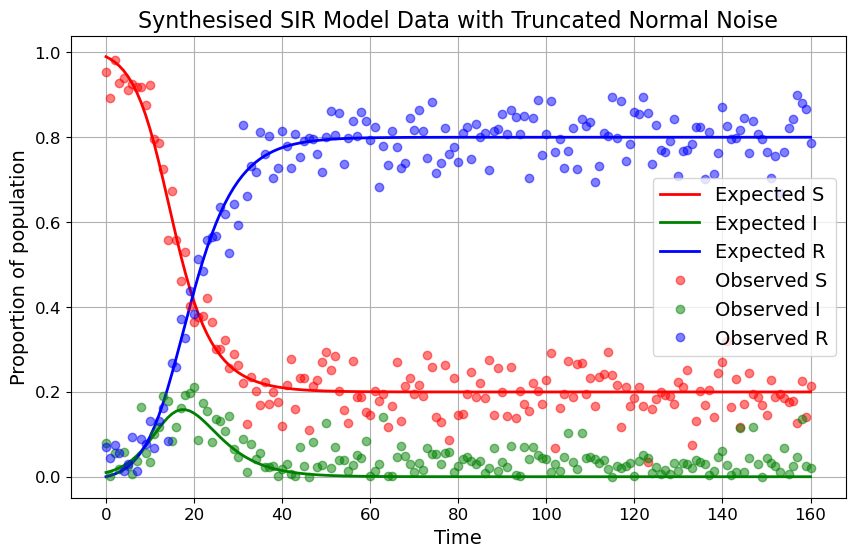

In [99]:
# set initial conditions
S_init = 0.99
I_init = 0.01
R_init = 0.0

# set true model parameters
beta_true = 0.5
gamma_true = 0.25

# set time points
t_values = np.linspace(0, 160, 161)

# solve the differential equations defined by sir_model
solution = odeint(sir_model, [S_init,I_init,R_init], t_values, args = (beta_true, gamma_true))
S, I, R = solution.T

# set standard deviation for noise
sigma_true = 0.05



# Define the function to generate truncated normal data
def generate_truncated_normal_data(expected_values, sigma, lower=0, upper=1):
    # calculate a and b for truncation
    a = (lower - expected_values) / sigma
    b = (upper - expected_values) / sigma
    # generate noisy data
    return truncnorm.rvs(a, b, loc=expected_values, scale=sigma)

# set random seed for reproducibility
rng = np.random.default_rng(40)

# generate noisy observed data
S_obs = generate_truncated_normal_data(S, sigma_true)
I_obs = generate_truncated_normal_data(I, sigma_true)
R_obs = generate_truncated_normal_data(R, sigma_true)

# plot results
plt.figure(figsize=(10, 6))
plt.plot(t_values, S, 'r-', label="Expected S")
plt.plot(t_values, I, 'g-', label="Expected I")
plt.plot(t_values, R, 'b-', label="Expected R")
plt.plot(t_values, S_obs, 'ro', label="Observed S", alpha=0.5)
plt.plot(t_values, I_obs, 'go', label="Observed I", alpha=0.5)
plt.plot(t_values, R_obs, 'bo', label="Observed R", alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Proportion of population")
plt.title("Synthesised SIR Model Data with Truncated Normal Noise")
plt.legend(loc=7)
plt.grid(True)
plt.savefig("Figures/synthesisation_truncated.pdf", dpi=1000, bbox_inches='tight')

In [100]:
# set initial conditions
S_init = 0.99
I_init = 0.01
R_init = 0.0

# set true model parameters
beta_true = 0.5
gamma_true = 0.25

# set time points
t_values = np.linspace(0, 160, 161)

# solve the differential equations defined by sir_model
solution = odeint(sir_model, [S_init,I_init,R_init], t_values, args = (beta_true, gamma_true))
S, I, R = solution.T

# set standard deviation for noise
sigma_true = 0.05

# set random seed for reproducibility
rng = np.random.default_rng(39)

# add normally distributed noise
S_obs = S + rng.normal(0, sigma_true, size=S.shape)
I_obs = I + rng.normal(0, sigma_true, size=I.shape)
R_obs = R + rng.normal(0, sigma_true, size=R.shape)

# plot results
plt.figure(figsize=(10, 6))
plt.plot(t_values, S, 'r-', label="Expected S")
plt.plot(t_values, I, 'g-', label="Expected I")
plt.plot(t_values, R, 'b-', label="Expected R")
plt.plot(t_values, S_obs, 'ro', label="Observed S", alpha=0.5)
plt.plot(t_values, I_obs, 'go', label="Observed I", alpha=0.5)
plt.plot(t_values, R_obs, 'bo', label="Observed R", alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Proportion of population")
plt.title("Synthesized SIR Model Data with Normal Noise")
plt.legend(loc=7)
plt.grid(True)
plt.savefig("Figures/synthesisation_normal.pdf", dpi=1000, bbox_inches='tight')

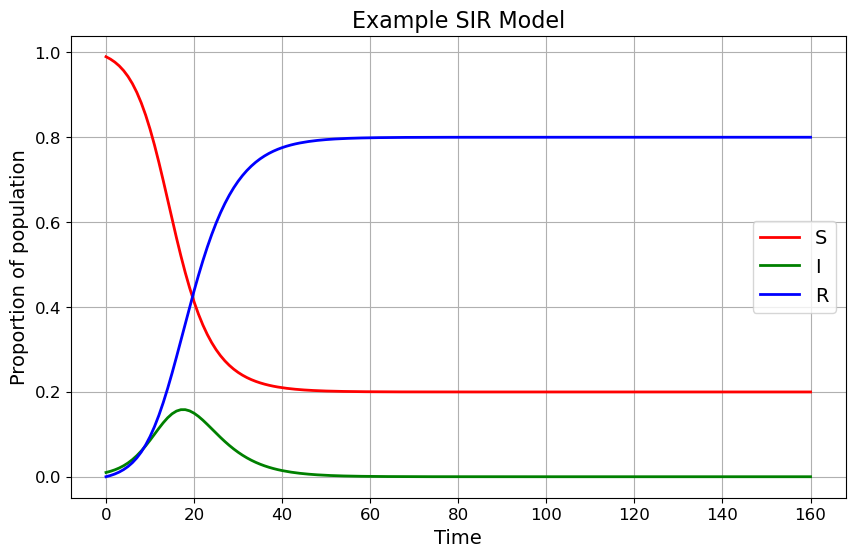

In [101]:
## for the purposes of an image in the report only

plt.figure(figsize=(10, 6))
plt.plot(t_values, S, 'r-', label="S")
plt.plot(t_values, I, 'g-', label="I")
plt.plot(t_values, R, 'b-', label="R")
plt.xlabel("Time")
plt.ylabel("Proportion of population")
plt.title("Example SIR Model")
plt.legend(loc=7)
plt.grid(True)
plt.savefig("Figures/SIR_model_example.pdf", dpi=1000, bbox_inches='tight')

# Simple coin flip example

## Informative vs non-informative priors

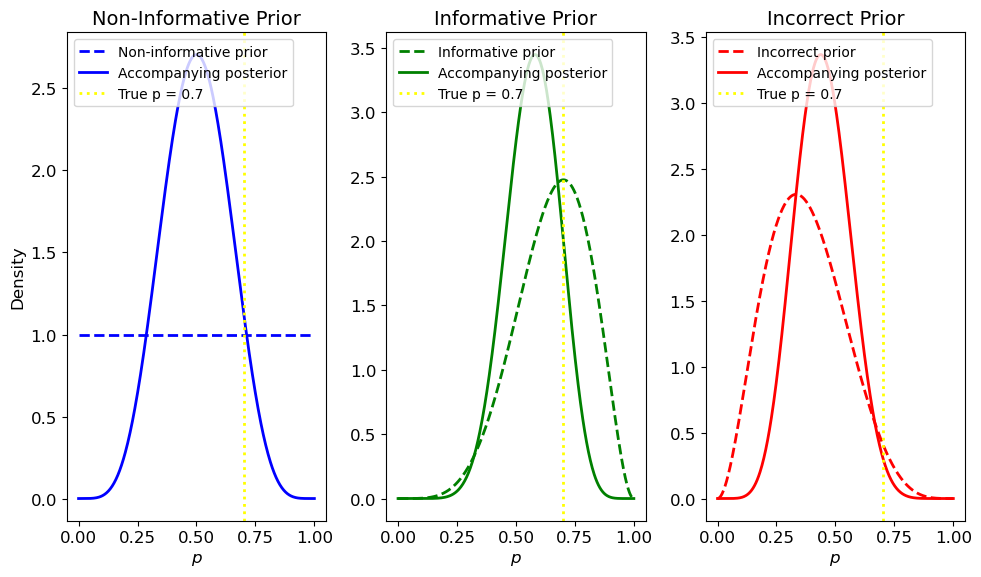

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_dist

# Given values
p_true = 0.7
k = 5
n = 10

# Define the priors and the colors
prior1 = {"Beta(1,1)": (1, 1, 'blue')}
prior2 = {"Beta(5.7,3)": (5.7, 3, 'green')}
prior3 = {"Beta(3,5)": (3, 5, 'red')}

# Define the range for p
p = np.linspace(0, 1, 500)

plt.figure(figsize=(10,6))  # Increased figure size

# Plot for the non-informative
plt.subplot(1, 3, 1)
for prior_name, (alpha_prior, beta_prior, color) in prior1.items():
    prior = beta_dist(alpha_prior, beta_prior)
    posterior = beta_dist(alpha_prior + k, beta_prior + (n - k))
    
    plt.plot(p, prior.pdf(p), '--', color=color, label='Non-informative prior', linewidth=2)  # Increased line width
    plt.plot(p, posterior.pdf(p), color=color, label='Accompanying posterior', linewidth=2)

plt.axvline(x=p_true, ls=':', color='yellow', label=f'True p = {p_true}', linewidth=2)
plt.title('Non-Informative Prior', fontsize=14)  # Increased font size
plt.xlabel(r'$p$', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(loc='upper left', fontsize=10)

# Plot for the informative prior
plt.subplot(1, 3, 2)
for prior_name, (alpha_prior, beta_prior, color) in prior2.items():
    prior = beta_dist(alpha_prior, beta_prior)
    posterior = beta_dist(alpha_prior + k, beta_prior + (n - k))
    
    plt.plot(p, prior.pdf(p), '--', color=color, label='Informative prior', linewidth=2)
    plt.plot(p, posterior.pdf(p), color=color, label='Accompanying posterior', linewidth=2)

plt.axvline(x=p_true, ls=':', color='yellow', label=f'True p = {p_true}', linewidth=2)
plt.title('Informative Prior', fontsize=14)
plt.xlabel(r'$p$', fontsize=12)
plt.legend(loc='upper left', fontsize=10)

# Plot for the incorrect prior
plt.subplot(1, 3, 3)
for prior_name, (alpha_prior, beta_prior, color) in prior3.items():
    prior = beta_dist(alpha_prior, beta_prior)
    posterior = beta_dist(alpha_prior + k, beta_prior + (n - k))
    
    plt.plot(p, prior.pdf(p), '--', color=color, label='Incorrect prior', linewidth=2)
    plt.plot(p, posterior.pdf(p), color=color, label='Accompanying posterior', linewidth=2)

plt.axvline(x=p_true, ls=':', color='yellow', label=f'True p = {p_true}', linewidth=2)
plt.title('Incorrect Prior', fontsize=14)
plt.xlabel(r'$p$', fontsize=12)
plt.legend(loc='upper left', fontsize=10)

plt.tight_layout()  # Added padding
plt.savefig("Figures/coinflip_informative_uninformative.pdf", dpi=1000, bbox_inches='tight')


## Jeffrey's priors

In [7]:
# Define the Jeffreys prior for p
def jeffreys_prior_p(p):
    return 1 / np.sqrt(p * (1 - p))

# Define the Jeffreys prior for theta (odds)
def jeffreys_prior_theta(theta):
    return 1 / (theta * (1 + theta))

# Bayesian update using p (probability)
def posterior_p(p, k, n):
    alpha_post = 0.5 + k
    beta_post = 0.5 + (n - k)
    return beta_dist.pdf(p, alpha_post, beta_post)

# Bayesian update using theta (odds)
def posterior_theta(theta, k, n):
    p = theta / (1 + theta)
    prior_theta = jeffreys_prior_theta(theta)
    likelihood = p**k * (1-p)**(n-k)
    return prior_theta * likelihood

# Observed data
k = 70  # Number of heads
n = 100 # Number of flips

# generate x-axis values for p and theta
p_vals = np.linspace(0.01, 0.99, 1000)
theta_vals = p_vals / (1 - p_vals)

# calculate the priors 
prior_p_vals = jeffreys_prior_p(p_vals)
prior_theta_vals = jeffreys_prior_theta(theta_vals)

# calculate posteriors
posterior_p_vals = posterior_p(p_vals, k, n)
posterior_theta_vals = posterior_theta(theta_vals, k, n)

# change back from theta to p using the change of variables formula
jacobian = 1 / (1 - p_vals)**2
prior_theta_as_p_vals = prior_theta_vals * jacobian
posterior_theta_as_p_vals = posterior_theta_vals * jacobian

# normalise all priors and posteriors to ensure they are valid distributions
prior_p_vals /= np.trapz(prior_p_vals, p_vals)
prior_theta_vals /= np.trapz(prior_theta_vals, theta_vals)

posterior_p_vals /= np.trapz(posterior_p_vals, p_vals)
posterior_theta_as_p_vals /= np.trapz(posterior_theta_as_p_vals, p_vals)

# plotting graphs
plt.figure(figsize=(10, 6))

# plot the experiment with p
ax1 = plt.subplot(1, 2, 1)
ax1.plot(p_vals, prior_p_vals, label=r"Prior using $p$", color = 'blue', linestyle = '--')
ax1.plot(p_vals, posterior_p_vals, label=r"Posterior using $p$", color='blue')
ax1.set_ylim(0, 20)
plt.xlabel(r"Probability of heads, $p$")
plt.ylabel("Density")
plt.title(r"Coin-Flip Experiment Using $p$")
ax1.legend()

# plot the experiment with theta
ax2 = plt.subplot(1, 2, 2)
ax2.plot(p_vals, prior_theta_as_p_vals, label=r"Prior using $\theta$", color = 'blue', linestyle = '--')
ax2.plot(p_vals, posterior_theta_as_p_vals, label=r"Posterior using $\theta$", color='blue')
ax2.set_ylim(0, 20)
plt.xlabel(r"Probability of heads, $p$ (converted from $\theta$)")
plt.title(r"Coin-Flip Experiment Using $\theta$")
ax2.legend()

plt.tight_layout()
plt.savefig("Figures/coinflip_jeffreys.pdf", dpi=1000, bbox_inches='tight')

# Checking shape of likelihood

In [8]:
## fix gamma and sigma to their true values
## then plot the likelihood shape for beta

# set initial conditions
S_init, I_init, R_init = 0.99, 0.01, 0

# create a range of beta values
beta_values = np.linspace(0.1, 1, 1000)
ll_values = []

# compute log-likelihood for each beta value
for beta in beta_values:
    S_sim, I_sim, R_sim = simulate_sir(beta, gamma_true, S_init, I_init, R_init, t_values)
    ll = log_likelihood(S_obs, I_obs, R_obs, S_sim, I_sim, R_sim, sigma_true)
    ll_values.append(ll)
    
    # save the beta with the max log-likelihood
    if ll == max(ll_values):
        ll_max = ll
        beta_max = beta

# plot the log-likelihood
plt.figure(figsize=(10, 6))
plt.plot(beta_values, ll_values, 'b-')
plt.axvline(x=beta_true, color='r', linestyle='--', label=rf'$\beta=${beta_true}')
plt.plot(beta_max, ll_max, 'ro', label = 'Point of max log-likelihood') 
plt.xlabel(r'$\beta$')
plt.ylabel('Log-likelihood')
plt.title(r'Log-likelihood for Different Values of $\beta$')
plt.grid(True)
plt.legend(loc = 7)
plt.savefig("Figures/MCMCSIR_loglikelihood.pdf", dpi=1000, bbox_inches='tight')

# MCMC-SIR models

### Beta with uninformative prior - gamma and sigma fixed

C:\Users\besso\AppData\Local\Temp\ipykernel_2168\3007911718.py:38: RuntimeWarning: overflow encountered in exp
  if np.random.rand() < np.exp(log_posterior_prop - log_posterior_cur):


Acceptance rate: 0.3574
Beta mean: 0.4998990192520589


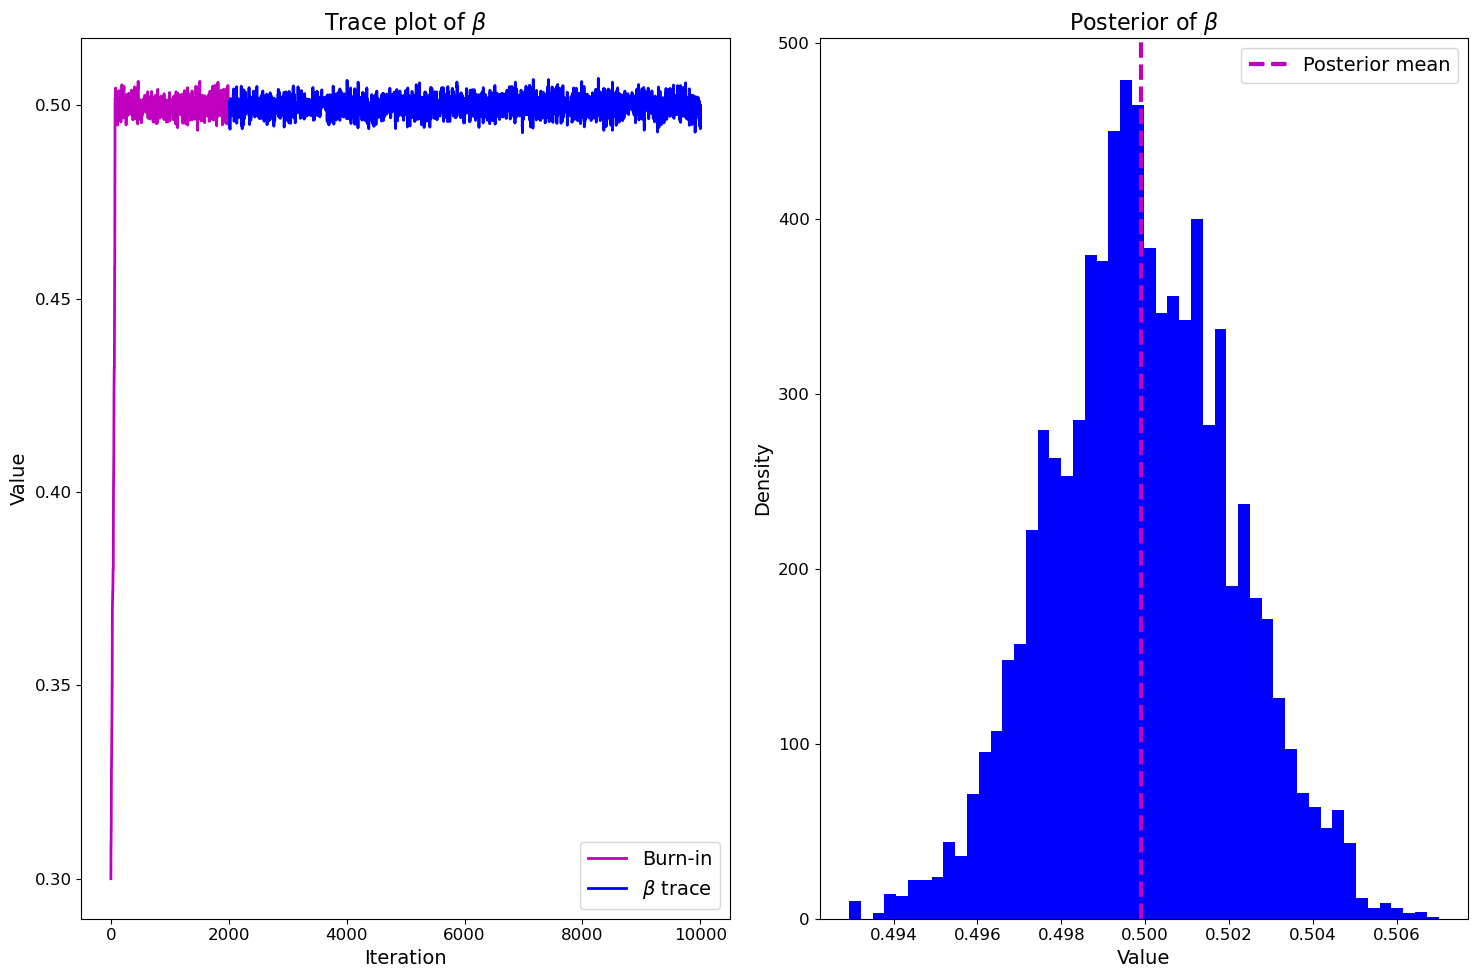

In [9]:
# define a prior for beta only
def log_prior(beta):
    log_prior_beta = expon.logpdf(beta, loc=0, scale=1000000)
    return log_prior_beta

def mcmc(S_obs, I_obs, R_obs, S_init, I_init, R_init, n_iter, step_size_beta):
    # set initial condition on beta
    # fix gamma and sigma on their true values
    beta_cur = 0.3
    
    # initialise accept counter and beta trace
    accept_count = 0
    beta_trace = [beta_cur]
    
    for i in range(n_iter):
        # propose new draw for beta
        beta_prop = np.random.normal(beta_cur, step_size_beta)
        
        # simulate the SIR values using the proposed value of beta
        S_sim_prop, I_sim_prop, R_sim_prop = simulate_sir(beta_prop, gamma_true, S_init, I_init, R_init, t_values)
        # simulate the SIR values using the current value of beta
        S_sim_cur, I_sim_cur, R_sim_cur = simulate_sir(beta_cur, gamma_true, S_init, I_init, R_init, t_values)
        
        # calculate the log-priors for both
        log_prior_prop = log_prior(beta_prop)
        log_prior_cur = log_prior(beta_cur)
        
        # calculate the log-likelihoods for both
        log_like_prop = log_likelihood(S_obs, I_obs, R_obs, S_sim_prop, I_sim_prop, R_sim_prop, sigma_true)
        log_like_cur = log_likelihood(S_obs, I_obs, R_obs, S_sim_cur, I_sim_cur, R_sim_cur, sigma_true)
        
        # calculate the log-posteriors for both
        # use equation log-posterior = log-prior + log-likelihood
        log_posterior_prop = log_prior_prop + log_like_prop
        log_posterior_cur = log_prior_cur + log_like_cur
        
        # acceptance probability is equal to exp(log_posterior_prop - log_posterior_cur)
        if np.random.rand() < np.exp(log_posterior_prop - log_posterior_cur):
            # if we accept, update beta
            beta_cur = beta_prop
            # and add one to the accept counter
            accept_count += 1
        
        # add the current value of beta to the trace
        beta_trace.append(beta_cur)
        
    # calculate acceptance rate at the end
    accept_rate = accept_count / n_iter
    
    return beta_trace, accept_rate


# set the initial conditions
S_init, I_init, R_init = 0.99, 0.01, 0

# set the number of iterations
n_iter = 10000

# set burn-in parameter
burn_in = 2000

# set the step size
step_size_beta = 0.007

# run MCMC
beta_trace, accept_rate = mcmc(S_obs, I_obs, R_obs, S_init, I_init, R_init, n_iter, step_size_beta)

# apply burn-in
beta_trace_burn_in = beta_trace[:burn_in]
beta_trace_post_burn_in = beta_trace[burn_in:]

# print acceptance rate
print("Acceptance rate:", accept_rate)

# print posterior mean
beta_mean = np.mean(beta_trace_post_burn_in)
print(f"Beta mean: {beta_mean}")


# plot results
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(range(burn_in), beta_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), beta_trace_post_burn_in, 'b', label=r'$\beta$ trace')
plt.title(r'Trace plot of $\beta$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(beta_trace_post_burn_in, bins=50, color='b')
plt.axvline(x=beta_mean, color='m', linestyle = '--', linewidth = 3, label = "Posterior mean")
plt.title(r'Posterior of $\beta$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

### Uninformative priors for all 3

In [10]:
# define the range for each parameter
beta_range = np.linspace(-1, 10000, 1000)
gamma_range = np.linspace(-1, 10000, 1000)
sigma_range = np.linspace(-1, 10000, 1000)

# calculate the prior densities for each parameter
beta_prior = expon.pdf(beta_range, loc=0, scale=1000000)
gamma_prior = expon.pdf(gamma_range, loc=0, scale=1000000)
sigma_prior = expon.pdf(sigma_range, loc=0, scale=1000000)

# plot the priors
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(beta_range, beta_prior, 'b')
plt.title('Prior of $\\beta$')
plt.xlabel('$\\beta$')
plt.ylabel('Density')
plt.ylim(0,0.0001)
plt.subplot(1, 3, 2)
plt.plot(gamma_range, gamma_prior, 'g')
plt.title('Prior of $\\gamma$')
plt.xlabel('$\\gamma$')
plt.ylim(0,0.0001)
plt.subplot(1, 3, 3)
plt.plot(sigma_range, sigma_prior, 'r')
plt.title('Prior of $\\sigma$')
plt.xlabel('$\\sigma$')
plt.ylim(0,0.0001)
plt.tight_layout()
plt.savefig("Figures/MCMCSIR_uninformative_prior.pdf", dpi=1000, bbox_inches='tight')

In [11]:
# calculates combined log-prior for given values of beta, gamma and sigma
def log_prior(beta, gamma, sigma):
    log_prior_beta = expon.logpdf(beta, loc=0, scale=1000000)
    log_prior_gamma = expon.logpdf(gamma, loc=0, scale=1000000)
    log_prior_sigma = expon.logpdf(sigma, loc=0, scale=1000000)
    log_prior = log_prior_beta + log_prior_gamma + log_prior_sigma
    return log_prior

def mcmc(S_obs, I_obs, R_obs, S_init, I_init, R_init, n_iter, step_size_beta, step_size_gamma, step_size_sigma):
    # set initial values (cur stands for 'current value')
    beta_cur = 0.3
    gamma_cur = 0.2
    sigma_cur = 0.2
    
    # initialise a counter for the number of accepted moves
    accept_count = 0
    
    # initialise arrays storing the traces for each parameter
    beta_trace, gamma_trace, sigma_trace = [beta_cur], [gamma_cur], [sigma_cur]
    
    for i in range(n_iter):
        # draw from proposal distributions
        beta_prop = np.random.normal(beta_cur, step_size_beta)
        gamma_prop = np.random.normal(gamma_cur, step_size_gamma)
        sigma_prop = np.random.normal(sigma_cur, step_size_sigma)
        
        S_sim_prop, I_sim_prop, R_sim_prop = simulate_sir(beta_prop, gamma_prop, S_init, I_init, R_init, t_values)
        S_sim_cur, I_sim_cur, R_sim_cur = simulate_sir(beta_cur, gamma_cur, S_init, I_init, R_init, t_values)
        
        # using the proposed values of beta and gamma, calculate the log-prior
        log_prior_prop = log_prior(beta_prop, gamma_prop, sigma_prop)
        # using the current values of beta and gamma, calculate the log-prior
        log_prior_cur = log_prior(beta_cur, gamma_cur, sigma_cur)
        
        # using the simulated values found using proposed parameters, calculate the log-likelihood of observing such data
        log_like_prop = log_likelihood(S_obs, I_obs, R_obs, S_sim_prop, I_sim_prop, R_sim_prop, sigma_prop)
        # using the simulated values found using current parameters, calculate the log-likelihood of observing such data
        log_like_cur = log_likelihood(S_obs, I_obs, R_obs, S_sim_cur, I_sim_cur, R_sim_cur, sigma_cur)
        
        # using the proposed parameters, calculate the log-posterior
        log_posterior_prop = log_prior_prop + log_like_prop
        # using the current parameters, calculate the log-posterior
        log_posterior_cur = log_prior_cur + log_like_cur
        
        # if we accept the proposed move, update the parameters and +1 to the accept counter
        if np.random.rand() < np.exp(log_posterior_prop - log_posterior_cur):
            beta_cur, gamma_cur, sigma_cur = beta_prop, gamma_prop, sigma_prop
            accept_count += 1
        
        # add the current parameters to their traces
        beta_trace.append(beta_cur)
        gamma_trace.append(gamma_cur)
        sigma_trace.append(sigma_cur)

    # calculate the acceptance rate
    accept_rate = accept_count / n_iter
    
    return beta_trace, gamma_trace, sigma_trace, accept_rate


# set the initial conditions
S_init, I_init, R_init = 0.99, 0.01, 0

# set number of iterations
n_iter = 10000

# set burn-in parameter
burn_in = 2000

# set step sizes
step_size_beta = 0.004
step_size_gamma = 0.004
step_size_sigma = 0.0014

# run the algorithm
beta_trace, gamma_trace, sigma_trace, accept_rate = mcmc(S_obs, I_obs, R_obs, 
                S_init, I_init, R_init, n_iter, step_size_beta, step_size_gamma, step_size_sigma)

# apply burn-in
beta_trace_burn_in = beta_trace[:burn_in]
beta_trace_post_burn_in = beta_trace[burn_in:]

gamma_trace_burn_in = gamma_trace[:burn_in]
gamma_trace_post_burn_in = gamma_trace[burn_in:]

sigma_trace_burn_in = sigma_trace[:burn_in]
sigma_trace_post_burn_in = sigma_trace[burn_in:]

# print acceptance rate
print("Acceptance rate:", accept_rate)

# print posterior means
beta_mean = np.mean(beta_trace_post_burn_in)
print(f"Beta mean: {beta_mean}")
gamma_mean = np.mean(gamma_trace_post_burn_in)
print(f"Gamma mean: {gamma_mean}")
sigma_mean = np.mean(sigma_trace_post_burn_in)
print(f"Sigma mean: {sigma_mean}")


# plot results
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.plot(range(burn_in), beta_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), beta_trace_post_burn_in, 'b', label=r'$\beta$ trace')
plt.title(r'Trace plot of $\beta$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 2)
plt.hist(beta_trace_post_burn_in, bins=50, color='b')
plt.axvline(x=beta_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\beta$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(range(burn_in), gamma_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), gamma_trace_post_burn_in, 'b', label=r'$\gamma$ trace')
plt.title(r'Trace plot of $\gamma$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 4)
plt.hist(gamma_trace_post_burn_in, bins=50, color='g')
plt.axvline(x=gamma_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\gamma$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(range(burn_in), sigma_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), sigma_trace_post_burn_in, 'b', label=r'$\sigma$ trace')
plt.title(r'Trace plot of $\sigma$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 6)
plt.hist(sigma_trace_post_burn_in, bins=50, color='r')
plt.axvline(x=sigma_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\sigma$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig("Figures/MCMCSIR_160days_uninformative_traces.pdf", dpi=1000, bbox_inches='tight')

Acceptance rate: 0.2639
Beta mean: 0.5020238320802399
Gamma mean: 0.25146992715706984
Sigma mean: 0.048696765152501154


In [12]:
plt.figure(figsize=(10, 6))
plt.plot(beta_trace_post_burn_in, gamma_trace_post_burn_in, 'o-', markersize=1, alpha = 0.3, label = 'Trace')
plt.plot(beta_true,gamma_true,'ro', label = r'True value') 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title(r'Trace plot of $\beta$ vs $\gamma$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/MCMCSIR_160days_uninformative_traceplot.pdf", dpi=1000, bbox_inches='tight')

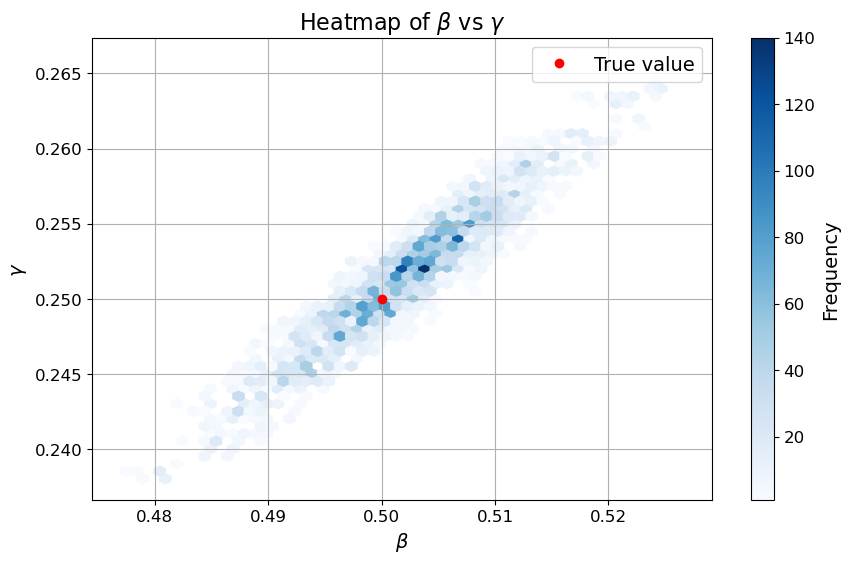

In [13]:
plt.figure(figsize=(10, 6))
plt.hexbin(beta_trace_post_burn_in, gamma_trace_post_burn_in, gridsize=50, cmap = 'Blues', mincnt=1)
plt.colorbar(label='Frequency')
plt.plot(beta_true,gamma_true,'ro', label = r'True value') 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title(r'Heatmap of $\beta$ vs $\gamma$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/MCMCSIR_160days_uninformative_heatmap.pdf", dpi=1000, bbox_inches='tight')

### Informative prior for gamma only

In [14]:
# define the range for each parameter
beta_range = np.linspace(-1, 10000, 1000)
gamma_range = np.linspace(-1, 3, 1000)
sigma_range = np.linspace(-1, 10000, 1000)

# calculate the prior densities for each parameter
beta_prior = expon.pdf(beta_range, loc=0, scale=1000000)
a,b = 0,np.inf 
sigma_trunc = 0.1 
gamma_prior = truncnorm.pdf(gamma_range, (a - gamma_true) / sigma_trunc,
                            (b - gamma_true) / sigma_trunc, loc=gamma_true, scale=sigma_trunc)
sigma_prior = expon.pdf(sigma_range, loc=0, scale=1000000)

# plot the priors
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(beta_range, beta_prior, 'b')
plt.title('Prior of $\\beta$')
plt.xlabel('$\\beta$')
plt.ylabel('Density')
plt.ylim(0,0.0001)
plt.subplot(1, 3, 2)
plt.plot(gamma_range, gamma_prior, 'g')
plt.title('Prior of $\\gamma$')
plt.xlabel('$\\gamma$')
plt.ylabel('Density')
plt.subplot(1, 3, 3)
plt.plot(sigma_range, sigma_prior, 'r')
plt.title('Prior of $\\sigma$')
plt.xlabel('$\\sigma$')
plt.ylabel('Density')
plt.ylim(0,0.0001)
plt.tight_layout()
plt.savefig("Figures/MCMCSIR_informative_prior.pdf", dpi=1000, bbox_inches='tight')

In [15]:
# calculates combined log-prior for given values of beta, gamma and sigma
def log_prior(beta, gamma, sigma):
    log_prior_beta = expon.logpdf(beta, loc=0, scale=1000000)
    log_prior_gamma = truncnorm.logpdf(gamma,(a - gamma_true) / sigma_trunc,
                            (b - gamma_true) / sigma_trunc, loc=gamma_true, scale=sigma_trunc)
    log_prior_sigma = expon.logpdf(sigma, loc=0, scale=1000000)
    log_prior = log_prior_beta + log_prior_gamma + log_prior_sigma
    return log_prior

def mcmc(S_obs, I_obs, R_obs, S_init, I_init, R_init, n_iter, step_size_beta, step_size_gamma, step_size_sigma):
    # set initial values (cur stands for 'current value')
    beta_cur = 0.3
    gamma_cur = 0.2
    sigma_cur = 0.2
    
    # initialise a counter for the number of accepted moves
    accept_count = 0
    
    # initialise arrays storing the traces for each parameter
    beta_trace, gamma_trace, sigma_trace = [beta_cur], [gamma_cur], [sigma_cur]
    
    for i in range(n_iter):
        # draw from proposal distributions
        beta_prop = np.random.normal(beta_cur, step_size_beta)
        gamma_prop = np.random.normal(gamma_cur, step_size_gamma)
        sigma_prop = np.random.normal(sigma_cur, step_size_sigma)
        
        S_sim_prop, I_sim_prop, R_sim_prop = simulate_sir(beta_prop, gamma_prop, S_init, I_init, R_init, t_values)
        S_sim_cur, I_sim_cur, R_sim_cur = simulate_sir(beta_cur, gamma_cur, S_init, I_init, R_init, t_values)
        
        # using the proposed values of beta and gamma, calculate the log-prior
        log_prior_prop = log_prior(beta_prop, gamma_prop, sigma_prop)
        # using the current values of beta and gamma, calculate the log-prior
        log_prior_cur = log_prior(beta_cur, gamma_cur, sigma_cur)
        
        # using the simulated values found using proposed parameters, calculate the log-likelihood of observing such data
        log_like_prop = log_likelihood(S_obs, I_obs, R_obs, S_sim_prop, I_sim_prop, R_sim_prop, sigma_prop)
        # using the simulated values found using current parameters, calculate the log-likelihood of observing such data
        log_like_cur = log_likelihood(S_obs, I_obs, R_obs, S_sim_cur, I_sim_cur, R_sim_cur, sigma_cur)
        
        # using the proposed parameters, calculate the log-posterior
        log_posterior_prop = log_prior_prop + log_like_prop
        # using the current parameters, calculate the log-posterior
        log_posterior_cur = log_prior_cur + log_like_cur
        
        # if we accept the proposed move, update the parameters and +1 to the accept counter
        if np.random.rand() < np.exp(log_posterior_prop - log_posterior_cur):
            beta_cur, gamma_cur, sigma_cur = beta_prop, gamma_prop, sigma_prop
            accept_count += 1
        
        # add the current parameters to their traces
        beta_trace.append(beta_cur)
        gamma_trace.append(gamma_cur)
        sigma_trace.append(sigma_cur)

    # calculate the acceptance rate
    accept_rate = accept_count / n_iter
    
    return beta_trace, gamma_trace, sigma_trace, accept_rate


# set the initial conditions
S_init, I_init, R_init = 0.99, 0.01, 0

# set number of iterations
n_iter = 10000

# set burn-in parameter
burn_in = 2000

# set step sizes
step_size_beta = 0.004
step_size_gamma = 0.004
step_size_sigma = 0.0014

# run the algorithm
beta_trace, gamma_trace, sigma_trace, accept_rate = mcmc(S_obs, I_obs, R_obs, 
                S_init, I_init, R_init, n_iter, step_size_beta, step_size_gamma, step_size_sigma)

# apply burn-in
beta_trace_burn_in = beta_trace[:burn_in]
beta_trace_post_burn_in = beta_trace[burn_in:]

gamma_trace_burn_in = gamma_trace[:burn_in]
gamma_trace_post_burn_in = gamma_trace[burn_in:]

sigma_trace_burn_in = sigma_trace[:burn_in]
sigma_trace_post_burn_in = sigma_trace[burn_in:]

# print acceptance rate
print("Acceptance rate:", accept_rate)

# print posterior means
beta_mean = np.mean(beta_trace_post_burn_in)
print(f"Beta mean: {beta_mean}")
gamma_mean = np.mean(gamma_trace_post_burn_in)
print(f"Gamma mean: {gamma_mean}")
sigma_mean = np.mean(sigma_trace_post_burn_in)
print(f"Sigma mean: {sigma_mean}")


# plot results
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.plot(range(burn_in), beta_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), beta_trace_post_burn_in, 'b', label=r'$\beta$ trace')
plt.title(r'Trace plot of $\beta$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 2)
plt.hist(beta_trace_post_burn_in, bins=50, color='b')
plt.axvline(x=beta_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\beta$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(range(burn_in), gamma_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), gamma_trace_post_burn_in, 'b', label=r'$\gamma$ trace')
plt.title(r'Trace plot of $\gamma$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 4)
plt.hist(gamma_trace_post_burn_in, bins=50, color='g')
plt.axvline(x=gamma_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\gamma$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(range(burn_in), sigma_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), sigma_trace_post_burn_in, 'b', label=r'$\sigma$ trace')
plt.title(r'Trace plot of $\sigma$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 6)
plt.hist(sigma_trace_post_burn_in, bins=50, color='r')
plt.axvline(x=sigma_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\sigma$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig("Figures/MCMCSIR_160days_informative_traces.pdf", dpi=1000, bbox_inches='tight')

Acceptance rate: 0.2632
Beta mean: 0.5039956539035001
Gamma mean: 0.2526018919044887
Sigma mean: 0.048569095018737365


# Restricting to 14 days

In [74]:
# restrict our observed data to 15 days only
day_restriction = 15
t_values = t_values[:day_restriction]
S = S[:day_restriction]
I = I[:day_restriction]
R = R[:day_restriction]
S_obs = S_obs[:day_restriction]
I_obs = I_obs[:day_restriction]
R_obs = R_obs[:day_restriction]

# plot results
plt.figure(figsize=(10, 6))
plt.plot(t_values, S, 'r-', label="True S")
plt.plot(t_values, I, 'g-', label="True I")
plt.plot(t_values, R, 'b-', label="True R")
plt.plot(t_values, S_obs, 'ro', label="Observed S", alpha=0.5)
plt.plot(t_values, I_obs, 'go', label="Observed I", alpha=0.5)
plt.plot(t_values, R_obs, 'bo', label="Observed R", alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Proportion of Population")
plt.title("Synthesised SIR Model Data, Restricted to 14 Days")
plt.legend()
plt.grid(True)
plt.savefig("Figures/synthesised_14days.pdf", dpi=1000, bbox_inches='tight')

### Uninformative priors for all 3

In [75]:
# define the range for each parameter
beta_range = np.linspace(-1, 10000, 1000)
gamma_range = np.linspace(-1, 10000, 1000)
sigma_range = np.linspace(-1, 10000, 1000)

# calculate the prior densities for each parameter
beta_prior = expon.pdf(beta_range, loc=0, scale=1000000)
gamma_prior = expon.pdf(gamma_range, loc=gamma_true, scale=1000000)
sigma_prior = expon.pdf(sigma_range, loc=0, scale=1000000)

# plot the priors
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(beta_range, beta_prior, 'b')
plt.title('Prior of $\\beta$')
plt.xlabel('$\\beta$')
plt.ylabel('Density')
plt.ylim(0,0.0001)
plt.subplot(1, 3, 2)
plt.plot(gamma_range, gamma_prior, 'g')
plt.title('Prior of $\\gamma$')
plt.xlabel('$\\gamma$')
plt.ylabel('Density')
plt.ylim(0,0.0001)
plt.subplot(1, 3, 3)
plt.plot(sigma_range, sigma_prior, 'r')
plt.title('Prior of $\\sigma$')
plt.xlabel('$\\sigma$')
plt.ylabel('Density')
plt.ylim(0,0.0001)
plt.tight_layout()
plt.show()

In [76]:
def log_prior(beta, gamma, sigma):
    log_prior_beta = expon.logpdf(beta, loc=0, scale=1000000)
    log_prior_gamma = expon.logpdf(gamma, loc=0, scale=1000000)
    log_prior_sigma = expon.logpdf(sigma, loc=0, scale=1000000)
    log_prior = log_prior_beta + log_prior_gamma + log_prior_sigma
    return log_prior

def mcmc(S_obs, I_obs, R_obs, S_init, I_init, R_init, n_iter, step_size_beta, step_size_gamma, step_size_sigma):
    beta_cur = 0.3
    gamma_cur = 0.1
    sigma_cur = 0.05
    
    accept_count = 0
    
    beta_trace, gamma_trace, sigma_trace = [beta_cur], [gamma_cur], [sigma_cur]
    
    for i in range(n_iter):
        beta_prop = np.random.normal(beta_cur, step_size_beta)
        gamma_prop = np.random.normal(gamma_cur, step_size_gamma)
        sigma_prop = np.random.normal(sigma_cur, step_size_sigma)
        
        S_sim_prop, I_sim_prop, R_sim_prop = simulate_sir(beta_prop, gamma_prop, S_init, I_init, R_init, t_values)
        S_sim_cur, I_sim_cur, R_sim_cur = simulate_sir(beta_cur, gamma_cur, S_init, I_init, R_init, t_values)
        
        log_prior_prop = log_prior(beta_prop, gamma_prop, sigma_prop)
        log_prior_cur = log_prior(beta_cur, gamma_cur, sigma_cur)
        
        log_like_prop = log_likelihood(S_obs, I_obs, R_obs, S_sim_prop, I_sim_prop, R_sim_prop, sigma_prop)
        log_like_cur = log_likelihood(S_obs, I_obs, R_obs, S_sim_cur, I_sim_cur, R_sim_cur, sigma_cur)
        
        log_posterior_prop = log_prior_prop + log_like_prop
        log_posterior_cur = log_prior_cur + log_like_cur
        
        if np.random.rand() < np.exp(log_posterior_prop - log_posterior_cur):
            beta_cur, gamma_cur, sigma_cur = beta_prop, gamma_prop, sigma_prop
            accept_count += 1
        
        beta_trace.append(beta_cur)
        gamma_trace.append(gamma_cur)
        sigma_trace.append(sigma_cur)

    accept_rate = accept_count / n_iter
    
    return beta_trace, gamma_trace, sigma_trace, accept_rate


S_init, I_init, R_init = 0.99, 0.01, 0

n_iter = 10000

burn_in = 2000

step_size_beta = 0.028
step_size_gamma = 0.028
step_size_sigma = 0.01

beta_trace, gamma_trace, sigma_trace, accept_rate = mcmc(S_obs, I_obs, R_obs, 
                S_init, I_init, R_init, n_iter, step_size_beta, step_size_gamma, step_size_sigma)

beta_trace_burn_in = beta_trace[:burn_in]
beta_trace_post_burn_in = beta_trace[burn_in:]

gamma_trace_burn_in = gamma_trace[:burn_in]
gamma_trace_post_burn_in = gamma_trace[burn_in:]

sigma_trace_burn_in = sigma_trace[:burn_in]
sigma_trace_post_burn_in = sigma_trace[burn_in:]

print("Acceptance rate:", accept_rate)

beta_mean = np.mean(beta_trace_post_burn_in)
print(f"Beta mean: {beta_mean}")
gamma_mean = np.mean(gamma_trace_post_burn_in)
print(f"Gamma mean: {gamma_mean}")
sigma_mean = np.mean(sigma_trace_post_burn_in)
print(f"Sigma mean: {sigma_mean}")


plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.plot(range(burn_in), beta_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), beta_trace_post_burn_in, 'b', label=r'$\beta$ trace')
plt.title(r'Trace plot of $\beta$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend(loc=4)

plt.subplot(3, 2, 2)
plt.hist(beta_trace_post_burn_in, bins=50, color='b')
plt.axvline(x=beta_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\beta$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(range(burn_in), gamma_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), gamma_trace_post_burn_in, 'b', label=r'$\gamma$ trace')
plt.title(r'Trace plot of $\gamma$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend(loc=4)

plt.subplot(3, 2, 4)
plt.hist(gamma_trace_post_burn_in, bins=50, color='g')
plt.axvline(x=gamma_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\gamma$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(range(burn_in), sigma_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), sigma_trace_post_burn_in, 'b', label=r'$\sigma$ trace')
plt.title(r'Trace plot of $\sigma$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 6)
plt.hist(sigma_trace_post_burn_in, bins=50, color='r')
plt.axvline(x=sigma_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\sigma$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc = 1)

plt.tight_layout()
plt.savefig("Figures/MCMCSIR_14days_uninformative_traces.pdf", dpi=1000, bbox_inches='tight')

Acceptance rate: 0.2044
Beta mean: 0.5099092304605386
Gamma mean: 0.26433346732060164
Sigma mean: 0.05489812226461753


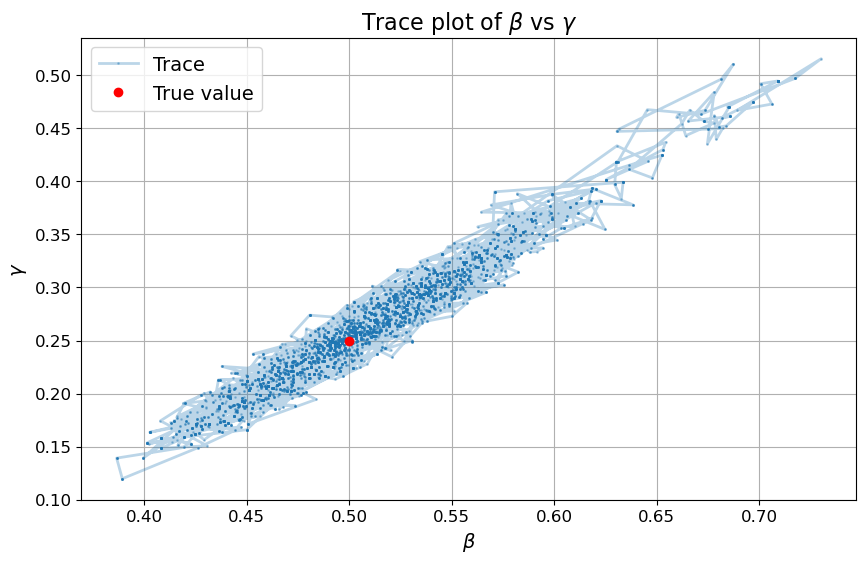

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(beta_trace_post_burn_in, gamma_trace_post_burn_in, 'o-', markersize=1, alpha = 0.3, label = 'Trace')
plt.plot(beta_true,gamma_true,'ro', label = r'True value') 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title(r'Trace plot of $\beta$ vs $\gamma$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/MCMCSIR_14days_uninformative_traceplot.pdf", dpi=1000, bbox_inches='tight')

In [78]:
plt.figure(figsize=(10, 6))
plt.hexbin(beta_trace_post_burn_in, gamma_trace_post_burn_in, gridsize=50, cmap = 'Blues', mincnt=1)
plt.colorbar(label='Frequency')
plt.plot(beta_true,gamma_true,'ro', label = r'True value') 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title(r'Heatmap of $\beta$ vs $\gamma$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/MCMCSIR_14days_uninformative_heatmap.pdf", dpi=1000, bbox_inches='tight')

### Informative prior for gamma only

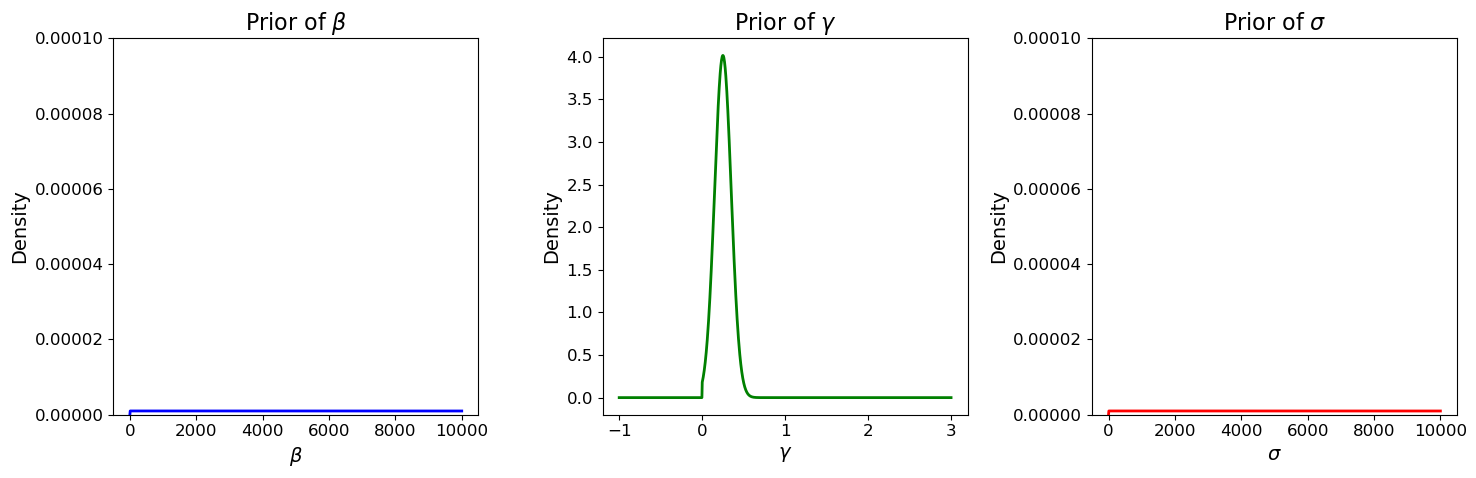

In [79]:
# define the range for each parameter
beta_range = np.linspace(-1, 10000, 1000)
gamma_range = np.linspace(-1, 3, 1000)
sigma_range = np.linspace(-1, 10000, 1000)

# calculate the prior densities for each parameter
beta_prior = expon.pdf(beta_range, loc=0, scale=1000000)
a,b = 0,np.inf 
sigma_trunc = 0.1 
gamma_prior = truncnorm.pdf(gamma_range, (a - gamma_true) / sigma_trunc,
                            (b - gamma_true) / sigma_trunc, loc=gamma_true, scale=sigma_trunc)
sigma_prior = expon.pdf(sigma_range, loc=0, scale=1000000)

# plot the priors
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(beta_range, beta_prior, 'b')
plt.title('Prior of $\\beta$')
plt.xlabel('$\\beta$')
plt.ylabel('Density')
plt.ylim(0,0.0001)
plt.subplot(1, 3, 2)
plt.plot(gamma_range, gamma_prior, 'g')
plt.title('Prior of $\\gamma$')
plt.xlabel('$\\gamma$')
plt.ylabel('Density')
plt.subplot(1, 3, 3)
plt.plot(sigma_range, sigma_prior, 'r')
plt.title('Prior of $\\sigma$')
plt.xlabel('$\\sigma$')
plt.ylabel('Density')
plt.ylim(0,0.0001)
plt.tight_layout()
plt.show()

In [80]:
def log_prior(beta, gamma, sigma):
    log_prior_beta = expon.logpdf(beta, loc=0, scale=1000000)
    log_prior_gamma = truncnorm.logpdf(gamma,(a - gamma_true) / sigma_trunc,
                            (b - gamma_true) / sigma_trunc, loc=gamma_true, scale=sigma_trunc)
    log_prior_sigma = expon.logpdf(sigma, loc=0, scale=1000000)
    log_prior = log_prior_beta + log_prior_gamma + log_prior_sigma
    return log_prior

def mcmc(S_obs, I_obs, R_obs, S_init, I_init, R_init, n_iter, step_size_beta, step_size_gamma, step_size_sigma):
    beta_cur = 0.3
    gamma_cur = 0.1
    sigma_cur = 0.05
    
    accept_count = 0
    
    beta_trace, gamma_trace, sigma_trace = [beta_cur], [gamma_cur], [sigma_cur]
    
    for i in range(n_iter):
        beta_prop = np.random.normal(beta_cur, step_size_beta)
        gamma_prop = np.random.normal(gamma_cur, step_size_gamma)
        sigma_prop = np.random.normal(sigma_cur, step_size_sigma)
        
        S_sim_prop, I_sim_prop, R_sim_prop = simulate_sir(beta_prop, gamma_prop, S_init, I_init, R_init, t_values)
        S_sim_cur, I_sim_cur, R_sim_cur = simulate_sir(beta_cur, gamma_cur, S_init, I_init, R_init, t_values)
        
        log_prior_prop = log_prior(beta_prop, gamma_prop, sigma_prop)
        log_prior_cur = log_prior(beta_cur, gamma_cur, sigma_cur)
        
        log_like_prop = log_likelihood(S_obs, I_obs, R_obs, S_sim_prop, I_sim_prop, R_sim_prop, sigma_prop)
        log_like_cur = log_likelihood(S_obs, I_obs, R_obs, S_sim_cur, I_sim_cur, R_sim_cur, sigma_cur)
        
        log_posterior_prop = log_prior_prop + log_like_prop
        log_posterior_cur = log_prior_cur + log_like_cur
        
        if np.random.rand() < np.exp(log_posterior_prop - log_posterior_cur):
            beta_cur, gamma_cur, sigma_cur = beta_prop, gamma_prop, sigma_prop
            accept_count += 1
        
        beta_trace.append(beta_cur)
        gamma_trace.append(gamma_cur)
        sigma_trace.append(sigma_cur)

    accept_rate = accept_count / n_iter
    
    return beta_trace, gamma_trace, sigma_trace, accept_rate


S_init, I_init, R_init = 0.99, 0.01, 0

n_iter = 10000

burn_in = 2000

step_size_beta = 0.031
step_size_gamma = 0.031
step_size_sigma = 0.01

beta_trace, gamma_trace, sigma_trace, accept_rate = mcmc(S_obs, I_obs, R_obs, 
                S_init, I_init, R_init, n_iter, step_size_beta, step_size_gamma, step_size_sigma)

beta_trace_burn_in = beta_trace[:burn_in]
beta_trace_post_burn_in = beta_trace[burn_in:]

gamma_trace_burn_in = gamma_trace[:burn_in]
gamma_trace_post_burn_in = gamma_trace[burn_in:]

sigma_trace_burn_in = sigma_trace[:burn_in]
sigma_trace_post_burn_in = sigma_trace[burn_in:]

print("Acceptance rate:", accept_rate)

beta_mean = np.mean(beta_trace_post_burn_in)
print(f"Beta mean: {beta_mean}")
gamma_mean = np.mean(gamma_trace_post_burn_in)
print(f"Gamma mean: {gamma_mean}")
sigma_mean = np.mean(sigma_trace_post_burn_in)
print(f"Sigma mean: {sigma_mean}")


plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.plot(range(burn_in), beta_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), beta_trace_post_burn_in, 'b', label=r'$\beta$ trace')
plt.title(r'Trace plot of $\beta$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 2)
plt.hist(beta_trace_post_burn_in, bins=50, color='b')
plt.axvline(x=beta_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\beta$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(range(burn_in), gamma_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), gamma_trace_post_burn_in, 'b', label=r'$\gamma$ trace')
plt.title(r'Trace plot of $\gamma$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 4)
plt.hist(gamma_trace_post_burn_in, bins=50, color='g')
plt.axvline(x=gamma_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\gamma$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(range(burn_in), sigma_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), sigma_trace_post_burn_in, 'b', label=r'$\sigma$ trace')
plt.title(r'Trace plot of $\sigma$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 6)
plt.hist(sigma_trace_post_burn_in, bins=50, color='r')
plt.axvline(x=sigma_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\sigma$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig("Figures/MCMCSIR_14days_informative_traces.pdf", dpi=1000, bbox_inches='tight')

Acceptance rate: 0.1842
Beta mean: 0.5144301476283634
Gamma mean: 0.2688167615946286
Sigma mean: 0.055404591724089756


In [81]:
plt.figure(figsize=(10, 6))
plt.plot(beta_trace_post_burn_in, gamma_trace_post_burn_in, 'o-', markersize=1, alpha = 0.3, label = 'Trace')
plt.plot(beta_true,gamma_true,'ro', label = r'True value') 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title(r'Trace plot of $\beta$ vs $\gamma$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/MCMCSIR_14days_informative_traceplot.pdf", dpi=1000, bbox_inches='tight')

In [82]:
plt.figure(figsize=(10, 6))
plt.hexbin(beta_trace_post_burn_in, gamma_trace_post_burn_in, gridsize=50, cmap = 'Blues', mincnt=1)
plt.colorbar(label='Frequency')
plt.plot(beta_true,gamma_true,'ro', label = r'True value') 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title(r'Heatmap of $\beta$ vs $\gamma$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/MCMCSIR_14days_informative_heatmap.pdf", dpi=1000, bbox_inches='tight')

# Working with final size data

## Set-up

In [102]:
# set the number of patients in the epidemic
n = 100000

# set true values
# T is 1/gamma
beta_true = 0.5
gamma_true = 0.25
T_true = 1 / gamma_true

# R0 = beta/gamma = beta*T
R0_true = beta_true / gamma_true

# the true tau is given by the final size equation

# set initial conditions
S_init = 0.99
I_init = 0.01
R_init = 0

# set time points
t_values = np.linspace(0, 160, 161)

# simulate the SIR model for this beta and T
S,I,R = simulate_sir(beta_true, gamma_true, S_init, I_init, R_init, t_values)

# plot results
plt.figure(figsize=(10, 6))
plt.plot(t_values, S, 'r-', label="S")
plt.plot(t_values, I, 'g-', label="I")
plt.plot(t_values, R, 'b-', label="R")
plt.xlabel("Time")
plt.ylabel("Proportion of population")
plt.title("Synthesised SIR Model Data")
# annotate final size with arrow
plt.annotate(r'Final size, $\tau$', xy=(160,0.8002), xytext=(130,0.6), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(loc=4)
plt.grid(True)
plt.savefig("Figures/synthesised_finalsize.pdf", dpi=1000, bbox_inches='tight')


# R converges to the final size
# our observed final size is as follows
tau_obs = R[-1]

# we can find R0 using the observed tau, by the final size equation
R0_obs = - np.log(1-tau_obs) / tau_obs

print("Observed tau:", tau_obs)
print("Observed R0:", R0_obs)

Observed tau: 0.8002039460312368
Observed R0: 2.0125596366478553


In [103]:
## defining functions we use repeatedly

# following this intuition, define a function which extracts final size
def final_size(beta, gamma, S_init, I_init, R_init, t_values):
    # simulates the SIR ODEs
    S,I,R = simulate_sir(beta, gamma, S_init, I_init, R_init, t_values)
    # returns the last value of R, which is convergent to final size
    final_size = R[-1]
    return final_size

# define a likelihood function for the upcoming MCMC algorithms
def log_likelihood(tau_obs, tau_sim, n, R0_sim):
    # V = (tau_sim*(1-tau_sim)*(1+((1-tau_sim)*(R0_sim**2)))) / (n*(1-((1-tau_sim)*R0_sim))**2)
#     log_likelihood = -(np.log(2*(np.pi)*V)) / 2 - ((tau_obs - tau_sim)**2) / (2*V)  

    log_V = (np.log(tau_sim) + np.log(1 - tau_sim) + np.log(1 + ((1 - tau_sim) * (R0_sim**2)))
              - np.log(n) - 2 * np.log(1 - ((1 - tau_sim) * R0_sim)))
             
    log_likelihood = - ((np.log(2 * np.pi)) / 2) - ((log_V) / 2) - (((tau_obs - tau_sim)**2) / (2 * np.exp(log_V)))
    
    return log_likelihood

C:\Users\besso\AppData\Local\Temp\ipykernel_2168\2389052579.py:16: RuntimeWarning: divide by zero encountered in log
  log_V = (np.log(tau_sim) + np.log(1 - tau_sim) + np.log(1 + ((1 - tau_sim) * (R0_sim**2)))
C:\Users\besso\AppData\Local\Temp\ipykernel_2168\2389052579.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  log_likelihood = - ((np.log(2 * np.pi)) / 2) - ((log_V) / 2) - (((tau_obs - tau_sim)**2) / (2 * np.exp(log_V)))
C:\Users\besso\AppData\Local\Temp\ipykernel_2168\2389052579.py:19: RuntimeWarning: invalid value encountered in scalar subtract
  log_likelihood = - ((np.log(2 * np.pi)) / 2) - ((log_V) / 2) - (((tau_obs - tau_sim)**2) / (2 * np.exp(log_V)))


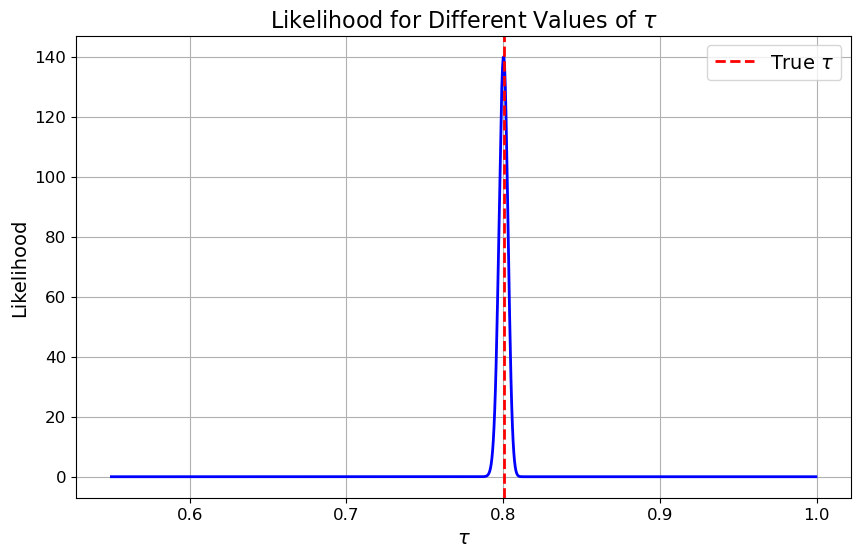

In [104]:
## checking the likelihood is defined effectively

# create a range of tau values
tau_values = np.linspace(0.55, 1, 1000)
likelihood_values = []

# compute log-likelihood of each tau value
for tau in tau_values:
    likelihood = np.exp(log_likelihood(tau_obs, tau, n, R0_obs))
    likelihood_values.append(likelihood)

# plot the likelihood
plt.figure(figsize=(10, 6))
plt.plot(tau_values, likelihood_values, 'b-')
plt.axvline(x=tau_obs, color='r', linestyle='--', label=r'True $\tau$')
plt.xlabel(r'$\tau$')
plt.ylabel('Likelihood')
plt.title(r'Likelihood for Different Values of $\tau$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/finalsize_likelihood.pdf", dpi=1000, bbox_inches='tight')

## Parameterisation 1: beta and gamma

### Uninformative priors for both

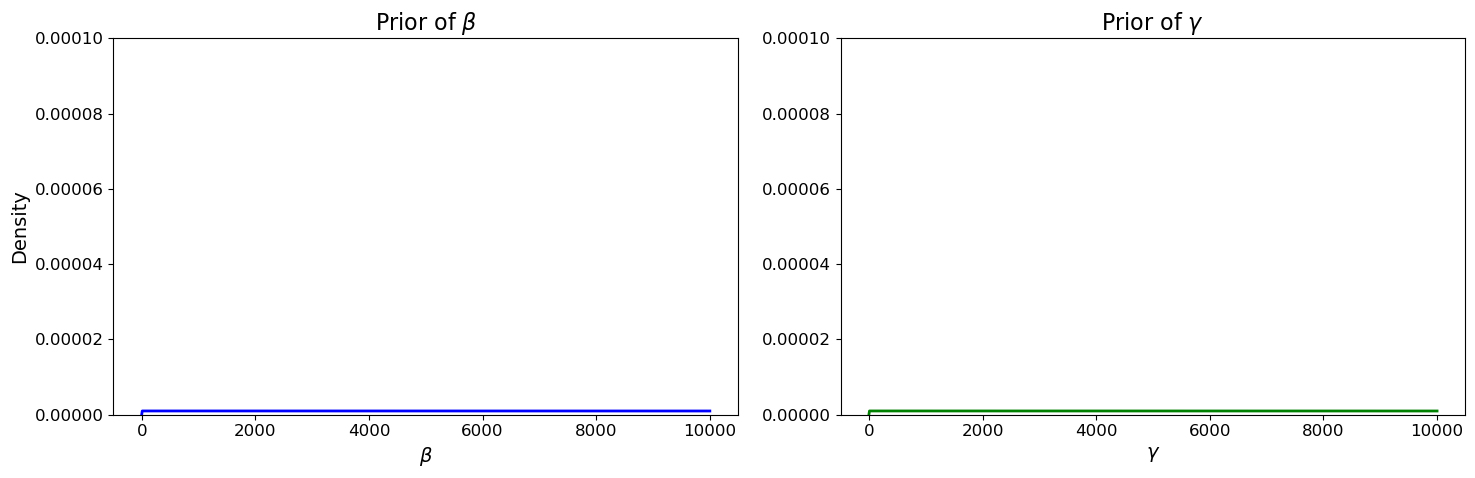

In [24]:
# define the range for each parameter
beta_range = np.linspace(-1, 10000, 1000)
gamma_range = np.linspace(-1, 10000, 1000)

# calculate the prior densities for each parameter
# scale is the inverse of the rate parameter lambda
beta_prior = expon.pdf(beta_range, loc=0, scale=1000000)
gamma_prior = expon.pdf(gamma_range, loc=0, scale=1000000)

# plot the priors
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(beta_range, beta_prior, 'b')
plt.title('Prior of $\\beta$')
plt.xlabel('$\\beta$')
plt.ylabel('Density')
plt.ylim(0,0.0001)

plt.subplot(1, 2, 2)
plt.plot(gamma_range, gamma_prior, 'g')
plt.title('Prior of $\\gamma$')
plt.xlabel('$\\gamma$')
plt.ylim(0,0.0001)

plt.tight_layout()
plt.savefig("Figures/finalsize_betagamma_uninformative_prior.pdf", dpi=1000, bbox_inches='tight')

Acceptance rate: 0.32001
Beta mean: 3.397610856795632
Gamma mean: 1.6989138850097683


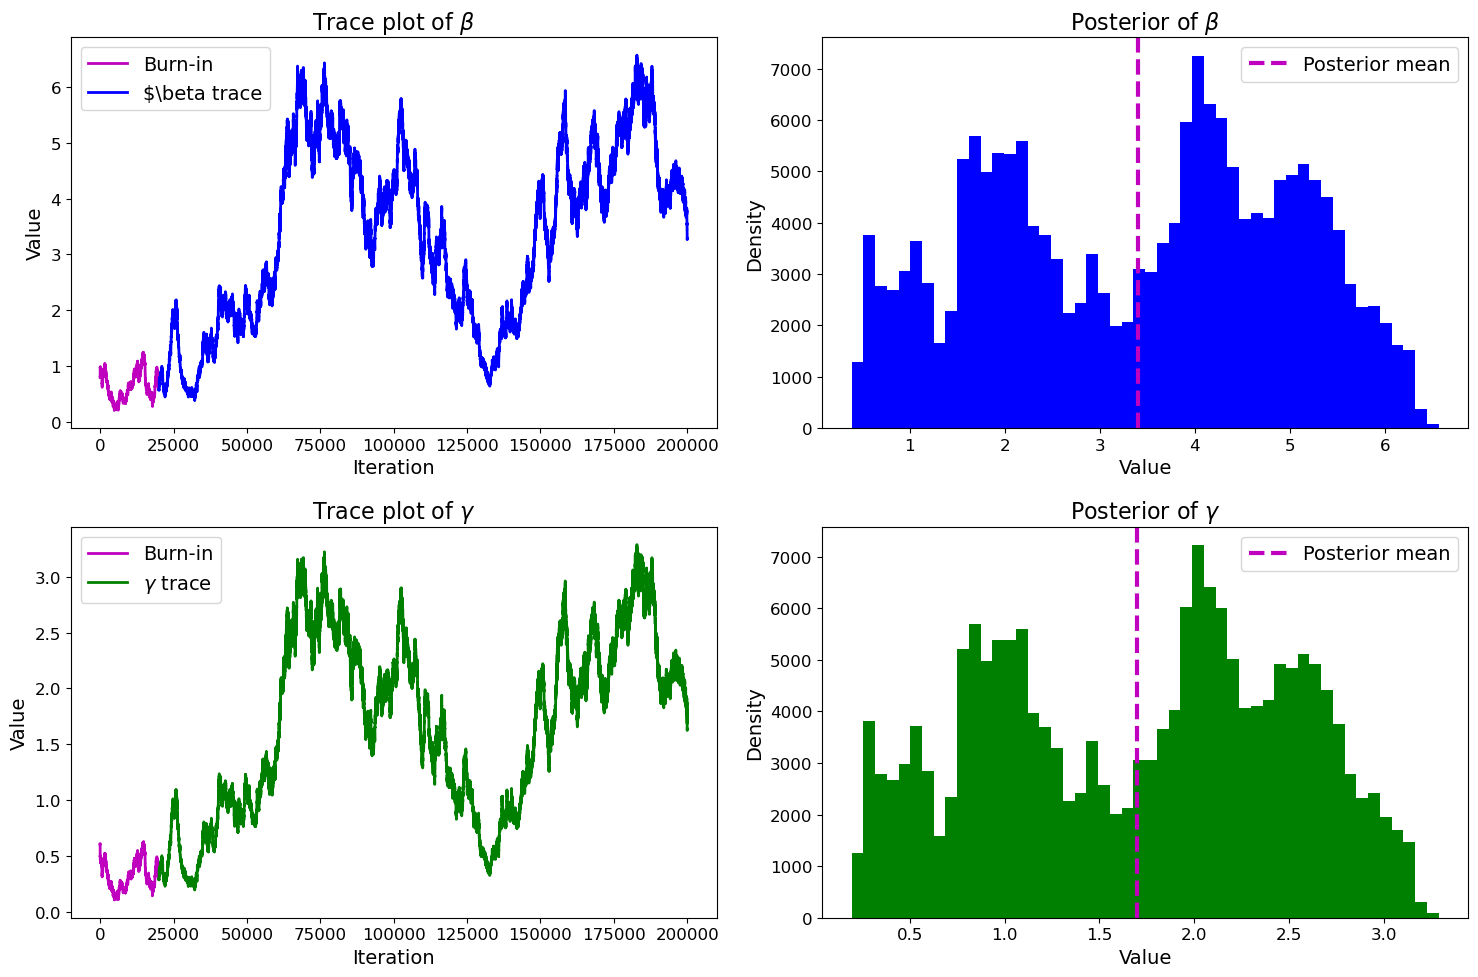

In [25]:
def log_prior(beta, gamma):
    log_prior_beta = expon.logpdf(beta, loc=0, scale=1000000)
    log_prior_gamma = expon.logpdf(gamma, loc=0, scale=1000000)
    log_prior = log_prior_beta + log_prior_gamma
    return log_prior

def mcmc(tau_obs, R0_obs, n, S_init, I_init, R_init, n_iter, step_size_beta, step_size_gamma):
    # set initial values (cur stands for 'current value')
    beta_cur = 0.8
    gamma_cur = 0.6
    
    # initialise a counter for the number of accepted moves
    accept_count = 0
    
    # initialise arrays storing the traces for each parameter
    beta_trace, gamma_trace = [beta_cur], [gamma_cur]
    
    for i in range(n_iter):
        # draw from proposal distributions
        beta_prop = np.random.normal(beta_cur, step_size_beta)
        gamma_prop = np.random.normal(gamma_cur, step_size_gamma)
        
        # calculate R0 using the proposed parameters
        R0_prop = beta_prop / gamma_prop
        # calculate R0 using the current parameters
        R0_cur = beta_cur / gamma_cur
        
        # calculate tau using the proposed parameters
        tau_prop = final_size(beta_prop, gamma_prop, S_init, I_init, R_init, t_values)
        # calculate tau using the current parameters
        tau_cur = final_size(beta_cur, gamma_cur, S_init, I_init, R_init, t_values)
        
        # calculate the log-prior using the proposed parameters
        log_prior_prop = log_prior(beta_prop, gamma_prop)
        # calculate the log-prior using the current parameters
        log_prior_cur = log_prior(beta_cur, gamma_cur)
        
        # using the simulated values found using proposed parameters, calculate the log-likelihood of observing our data
        log_like_prop = log_likelihood(tau_obs, tau_prop, n, R0_prop)
        # using the simulated values found using current parameters, calculate the log-likelihood of observing our data
        log_like_cur = log_likelihood(tau_obs, tau_cur, n, R0_cur)
        
        # calculate the log-posterior using the proposed parameters
        log_posterior_prop = log_prior_prop + log_like_prop
        # calculate the log-posterior using the current parameters
        log_posterior_cur = log_prior_cur + log_like_cur
        
        # if we accept the proposed move, update the parameters and +1 to the accept counter
        if np.random.rand() < np.exp(log_posterior_prop - log_posterior_cur):
            beta_cur, gamma_cur = beta_prop, gamma_prop
            accept_count += 1
        
        # add the current parameters to their traces
        beta_trace.append(beta_cur)
        gamma_trace.append(gamma_cur)
        
    # calculate the acceptance rate
    accept_rate = accept_count / n_iter
    
    return beta_trace, gamma_trace, accept_rate

# set initial conditions
S_init, I_init, R_init = 0.99, 0.01, 0

# set number of iterations
n_iter = 200000

# set burn-in period
burn_in = 20000

# set step sizes
step_size_beta = 0.025
step_size_gamma = 0.025

# run the algorithm
beta_trace, gamma_trace, accept_rate = mcmc(tau_obs, R0_obs, n,
                S_init, I_init, R_init, n_iter, step_size_beta, step_size_gamma)

# apply burn-in
beta_trace_burn_in = beta_trace[:burn_in]
beta_trace_post_burn_in = beta_trace[burn_in:]

gamma_trace_burn_in = gamma_trace[:burn_in]
gamma_trace_post_burn_in = gamma_trace[burn_in:]

# print acceptance rate
print("Acceptance rate:", accept_rate)

# print means
beta_mean = np.mean(beta_trace_post_burn_in)
print(f"Beta mean: {beta_mean}")
gamma_mean = np.mean(gamma_trace_post_burn_in)
print(f"Gamma mean: {gamma_mean}")


# plotting results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(range(burn_in), beta_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), beta_trace_post_burn_in, 'b', label=r'$\beta$ trace')
plt.title(r'Trace plot of $\beta$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(beta_trace_post_burn_in, bins=50, color='b')
plt.axvline(x=beta_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\beta$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(burn_in), gamma_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), gamma_trace_post_burn_in, 'g', label=r'$\gamma$ trace')
plt.title(r'Trace plot of $\gamma$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(gamma_trace_post_burn_in, bins=50, color='g')
plt.axvline(x=gamma_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\gamma$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig("Figures/finalsize_betagamma_uninformative_traces.pdf", dpi=1000, bbox_inches='tight')

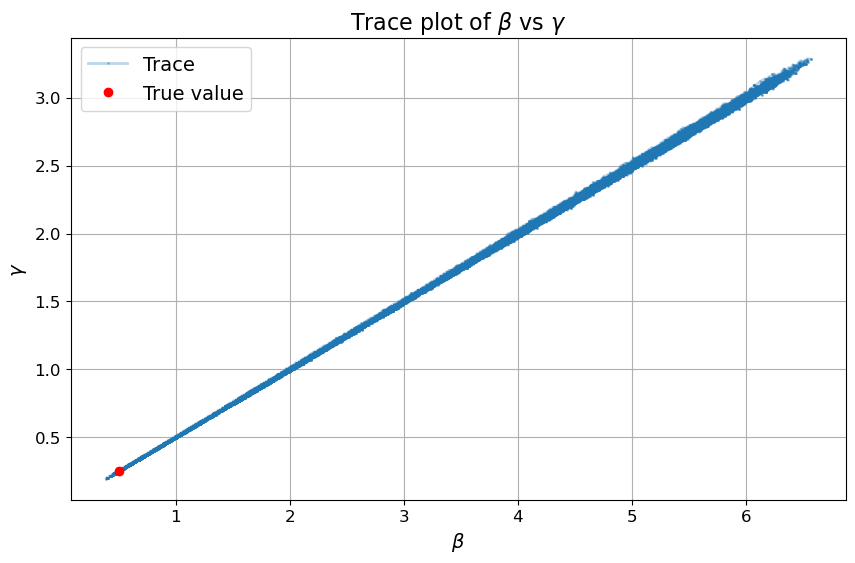

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(beta_trace_post_burn_in, gamma_trace_post_burn_in, 'o-', markersize=1, alpha = 0.3, label = 'Trace')
plt.plot(beta_true,gamma_true,'ro', label = r'True value') 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title(r'Trace plot of $\beta$ vs $\gamma$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/finalsize_betagamma_uninformative_traceplot.pdf", dpi=1000, bbox_inches='tight')

In [27]:
plt.figure(figsize=(10, 6))
plt.hexbin(beta_trace_post_burn_in, gamma_trace_post_burn_in, gridsize=50, cmap = 'Blues', mincnt=1)
plt.colorbar(label='Frequency')
plt.plot(beta_true,gamma_true,'ro', label = r'True value') 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title(r'Heatmap of $\beta$ vs $\gamma$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/finalsize_betagamma_uninformative_heatmap.pdf", dpi=1000, bbox_inches='tight')

### Informative prior for gamma only

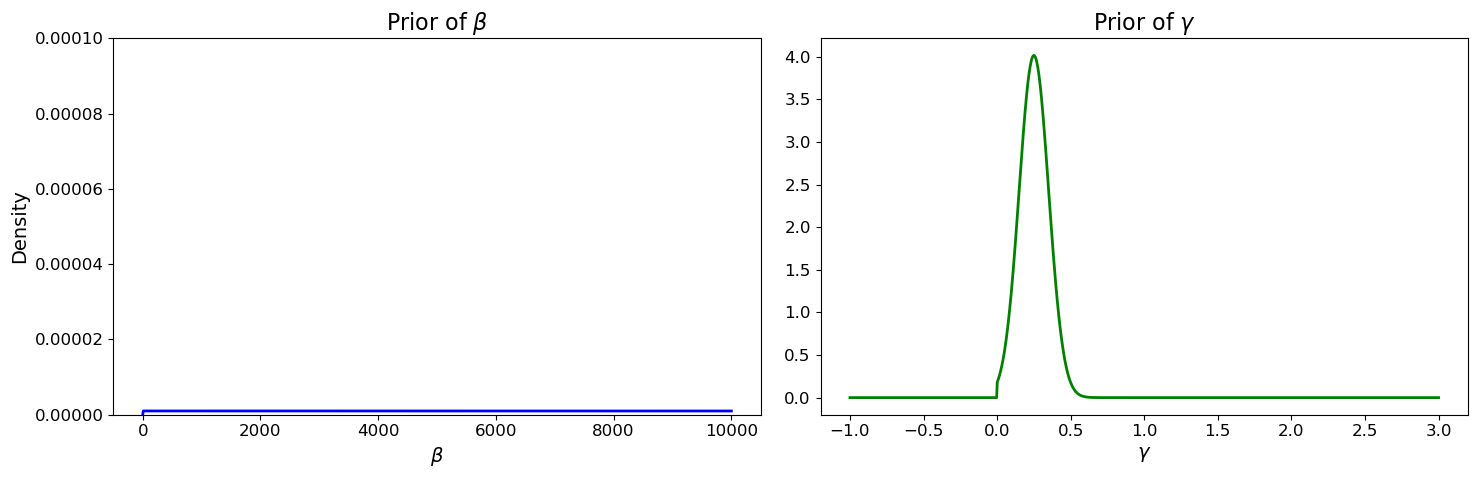

In [28]:
# define the range for each parameter
beta_range = np.linspace(-1, 10000, 1000)
gamma_range = np.linspace(-1, 3, 1000)

# calculate the prior densities for each parameter
beta_prior = expon.pdf(beta_range, loc=0, scale=1000000)
a,b = 0,np.inf 
sigma_trunc = 0.1 
gamma_prior = truncnorm.pdf(gamma_range, (a - gamma_true) / sigma_trunc,
                            (b - gamma_true) / sigma_trunc, loc=gamma_true, scale=sigma_trunc)

# plot the priors
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(beta_range, beta_prior, 'b') 
plt.title('Prior of $\\beta$')
plt.xlabel('$\\beta$')
plt.ylabel('Density')
plt.ylim(0,0.0001)
plt.subplot(1, 2, 2)
plt.plot(gamma_range, gamma_prior, 'g')
plt.title('Prior of $\\gamma$')
plt.xlabel('$\\gamma$')
plt.tight_layout()
plt.savefig("Figures/finalsize_betagamma_informative_prior.pdf", dpi=1000, bbox_inches='tight')

In [29]:
def log_prior(beta, gamma):
    log_prior_beta = expon.logpdf(beta, loc=0, scale=1000000)
    log_prior_gamma = truncnorm.logpdf(gamma,(a - gamma_true) / sigma_trunc,
                            (b - gamma_true) / sigma_trunc, loc=gamma_true, scale=sigma_trunc)
    log_prior = log_prior_beta + log_prior_gamma
    return log_prior


def mcmc(tau_obs, R0_obs, n, S_init, I_init, R_init, n_iter, step_size_beta, step_size_gamma):
    # set initial values (cur stands for 'current value')
    beta_cur = 0.8
    gamma_cur = 0.6
    
    # initialise a counter for the number of accepted moves
    accept_count = 0
    
    # initialise arrays storing the traces for each parameter
    beta_trace, gamma_trace = [beta_cur], [gamma_cur]
    
    for i in range(n_iter):
        # draw from proposal distributions
        beta_prop = np.random.normal(beta_cur, step_size_beta)
        gamma_prop = np.random.normal(gamma_cur, step_size_gamma)
        
        # calculate R0 using the proposed parameters
        R0_prop = beta_prop / gamma_prop
        # calculate R0 using the current parameters
        R0_cur = beta_cur / gamma_cur
        
        # calculate tau using the proposed parameters
        tau_prop = final_size(beta_prop, gamma_prop, S_init, I_init, R_init, t_values)
        # calculate tau using the current parameters
        tau_cur = final_size(beta_cur, gamma_cur, S_init, I_init, R_init, t_values)
        
        # calculate the log-prior using the proposed parameters
        log_prior_prop = log_prior(beta_prop, gamma_prop)
        # calculate the log-prior using the current parameters
        log_prior_cur = log_prior(beta_cur, gamma_cur)
        
        # using the simulated values found using proposed parameters, calculate the log-likelihood of observing our data
        log_like_prop = log_likelihood(tau_obs, tau_prop, n, R0_prop)
        # using the simulated values found using current parameters, calculate the log-likelihood of observing our data
        log_like_cur = log_likelihood(tau_obs, tau_cur, n, R0_cur)
        
        # calculate the log-posterior using the proposed parameters
        log_posterior_prop = log_prior_prop + log_like_prop
        # calculate the log-posterior using the current parameters
        log_posterior_cur = log_prior_cur + log_like_cur
        
        # if we accept the proposed move, update the parameters and +1 to the accept counter
        if np.random.rand() < np.exp(log_posterior_prop - log_posterior_cur):
            beta_cur, gamma_cur = beta_prop, gamma_prop
            accept_count += 1
        
        # add the current parameters to their traces
        beta_trace.append(beta_cur)
        gamma_trace.append(gamma_cur)
        
    # calculate the acceptance rate
    accept_rate = accept_count / n_iter
    
    return beta_trace, gamma_trace, accept_rate

# set initial conditions
S_init, I_init, R_init = 0.99, 0.01, 0

# set number of iterations
n_iter = 200000

# set burn-in period
burn_in = 20000

# set step sizes
step_size_beta = 0.008
step_size_gamma = 0.008

# run the algorithm
beta_trace, gamma_trace, accept_rate = mcmc(tau_obs, R0_obs, n,
                S_init, I_init, R_init, n_iter, step_size_beta, step_size_gamma)

# apply burn-in
beta_trace_burn_in = beta_trace[:burn_in]
beta_trace_post_burn_in = beta_trace[burn_in:]

gamma_trace_burn_in = gamma_trace[:burn_in]
gamma_trace_post_burn_in = gamma_trace[burn_in:]

# print acceptance rate
print("Acceptance rate:", accept_rate)

# print means
beta_mean = np.mean(beta_trace_post_burn_in)
print(f"Beta mean: {beta_mean}")
gamma_mean = np.mean(gamma_trace_post_burn_in)
print(f"Gamma mean: {gamma_mean}")


# plotting results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(range(burn_in), beta_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), beta_trace_post_burn_in, 'b', label=r'$\beta$ trace')
plt.title(r'Trace plot of $\beta$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(beta_trace_post_burn_in, bins=50, color='b')
plt.axvline(x=beta_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\beta$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(burn_in), gamma_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), gamma_trace_post_burn_in, 'g', label=r'$\gamma$ trace')
plt.title(r'Trace plot of $\gamma$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(gamma_trace_post_burn_in, bins=50, color='g')
plt.axvline(x=gamma_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\gamma$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig("Figures/finalsize_betagamma_informative_traces.pdf", dpi=1000, bbox_inches='tight')

Acceptance rate: 0.213685
Beta mean: 0.5784234591658652
Gamma mean: 0.289204136234591


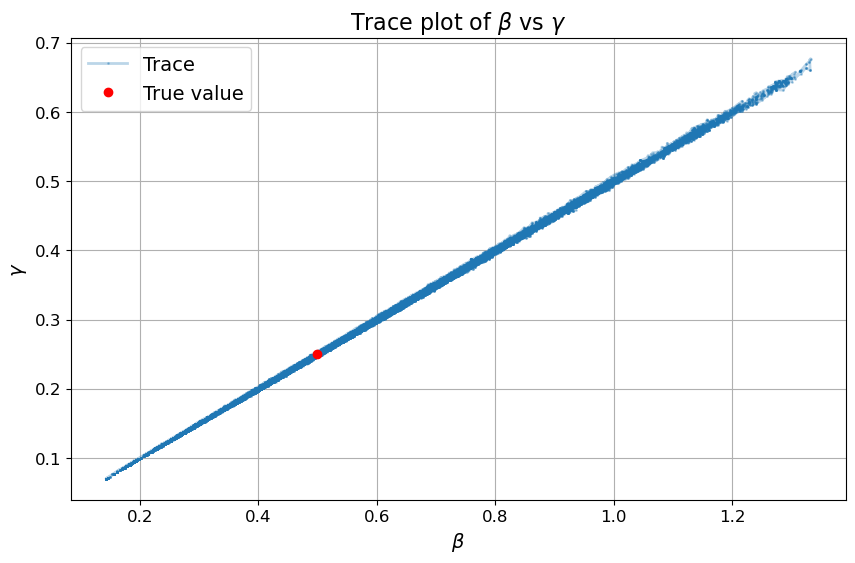

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(beta_trace_post_burn_in, gamma_trace_post_burn_in, 'o-', markersize=1, alpha = 0.3, label = 'Trace')
plt.plot(beta_true,gamma_true,'ro', label = r'True value') 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title(r'Trace plot of $\beta$ vs $\gamma$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/finalsize_betagamma_informative_traceplot.pdf", dpi=1000, bbox_inches='tight')

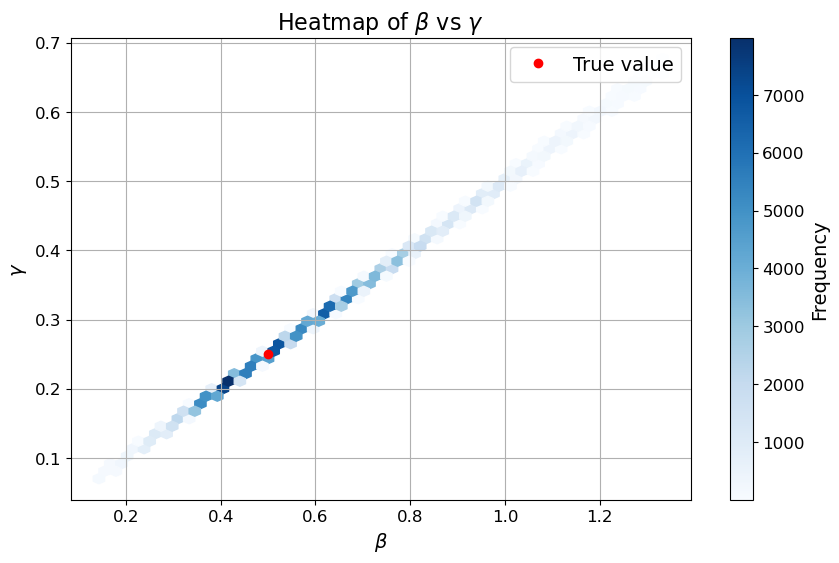

In [31]:
plt.figure(figsize=(10, 6))
plt.hexbin(beta_trace_post_burn_in, gamma_trace_post_burn_in, gridsize=50, cmap = 'Blues', mincnt=1)
plt.colorbar(label='Frequency')
plt.plot(beta_true,gamma_true,'ro', label = r'True value') 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title(r'Heatmap of $\beta$ vs $\gamma$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/finalsize_betagamma_informative_heatmap.pdf", dpi=1000, bbox_inches='tight')

### Adaptive proposal distribution

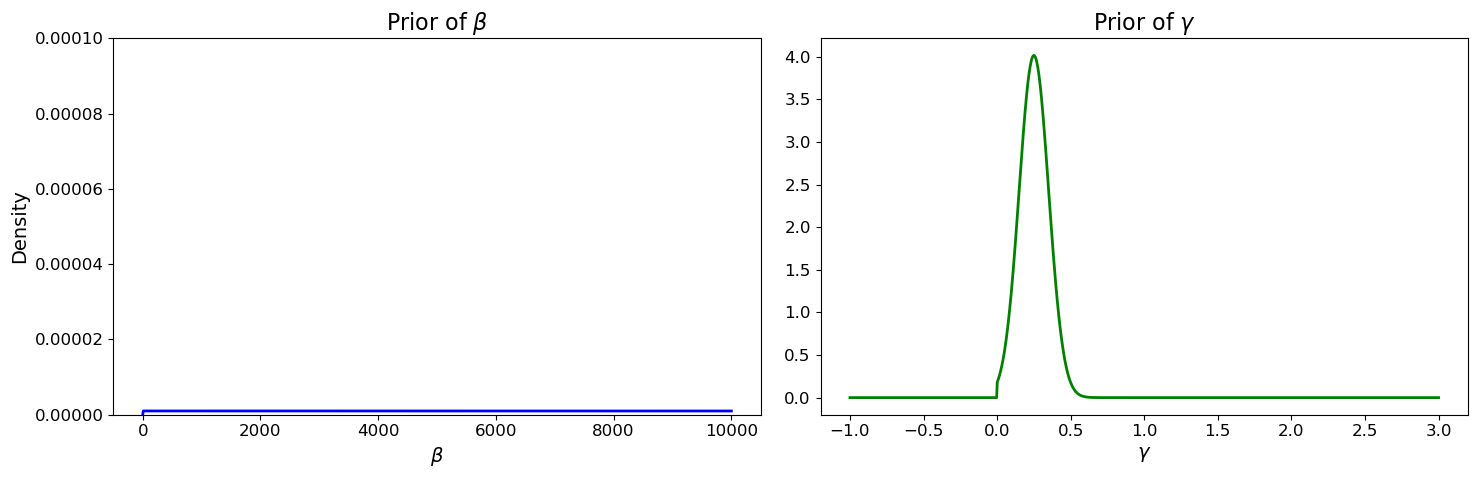

In [130]:
# define the range for each parameter
beta_range = np.linspace(-1, 10000, 1000)
gamma_range = np.linspace(-1, 3, 1000)

# calculate the prior densities for each parameter
beta_prior = expon.pdf(beta_range, loc=0, scale=1000000)
a,b = 0,np.inf 
sigma_trunc = 0.1 
gamma_prior = truncnorm.pdf(gamma_range, (a - gamma_true) / sigma_trunc,
                            (b - gamma_true) / sigma_trunc, loc=gamma_true, scale=sigma_trunc)

# plot the priors
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(beta_range, beta_prior, 'b') 
plt.title('Prior of $\\beta$')
plt.xlabel('$\\beta$')
plt.ylabel('Density')
plt.ylim(0,0.0001)
plt.subplot(1, 2, 2)
plt.plot(gamma_range, gamma_prior, 'g')
plt.title('Prior of $\\gamma$')
plt.xlabel('$\\gamma$')
plt.tight_layout()
plt.show()

Running iteration 1/20...


C:\Users\besso\AppData\Local\Temp\ipykernel_2168\2389052579.py:16: RuntimeWarning: invalid value encountered in log
  log_V = (np.log(tau_sim) + np.log(1 - tau_sim) + np.log(1 + ((1 - tau_sim) * (R0_sim**2)))
C:\Users\besso\AppData\Local\Temp\ipykernel_2168\2389052579.py:19: RuntimeWarning: overflow encountered in scalar power
  log_likelihood = - ((np.log(2 * np.pi)) / 2) - ((log_V) / 2) - (((tau_obs - tau_sim)**2) / (2 * np.exp(log_V)))
C:\Users\besso\AppData\Local\Temp\ipykernel_2168\2389052579.py:17: RuntimeWarning: invalid value encountered in log
  - np.log(n) - 2 * np.log(1 - ((1 - tau_sim) * R0_sim)))
C:\Users\besso\AppData\Local\Temp\ipykernel_2168\3752043509.py:5: RuntimeWarning: overflow encountered in scalar multiply
  dIdt = beta * S * I - gamma * I
C:\Users\besso\AppData\Local\Temp\ipykernel_2168\3752043509.py:6: RuntimeWarning: overflow encountered in scalar multiply
  dRdt = gamma * I
C:\Users\besso\AppData\Local\Temp\ipykernel_2168\3752043509.py:4: RuntimeWarning: over

Acceptance rate: 0.0017
New step size: 0.8000
New starting points: beta=0.4919, gamma=0.2448
Updated covariance matrix:
[[0.0434378  0.02193794]
 [0.02193794 0.01108595]]

Running iteration 2/20...
Acceptance rate: 0.4450
New step size: 0.9600
New starting points: beta=0.5808, gamma=0.2905
Updated covariance matrix:
[[0.02920771 0.0146143 ]
 [0.0146143  0.00731593]]

Running iteration 3/20...
Acceptance rate: 0.5100
New step size: 1.1520
New starting points: beta=0.5927, gamma=0.2963
Updated covariance matrix:
[[0.03310326 0.01654921]
 [0.01654921 0.00827743]]

Running iteration 4/20...
Acceptance rate: 0.4481
New step size: 1.3824
New starting points: beta=0.5871, gamma=0.2936
Updated covariance matrix:
[[0.03316327 0.01659827]
 [0.01659827 0.00831143]]

Running iteration 5/20...
Acceptance rate: 0.4166
New step size: 1.6589
New starting points: beta=0.5919, gamma=0.2959
Updated covariance matrix:
[[0.03657229 0.01826974]
 [0.01826974 0.00913048]]

Running iteration 6/20...
Acceptance

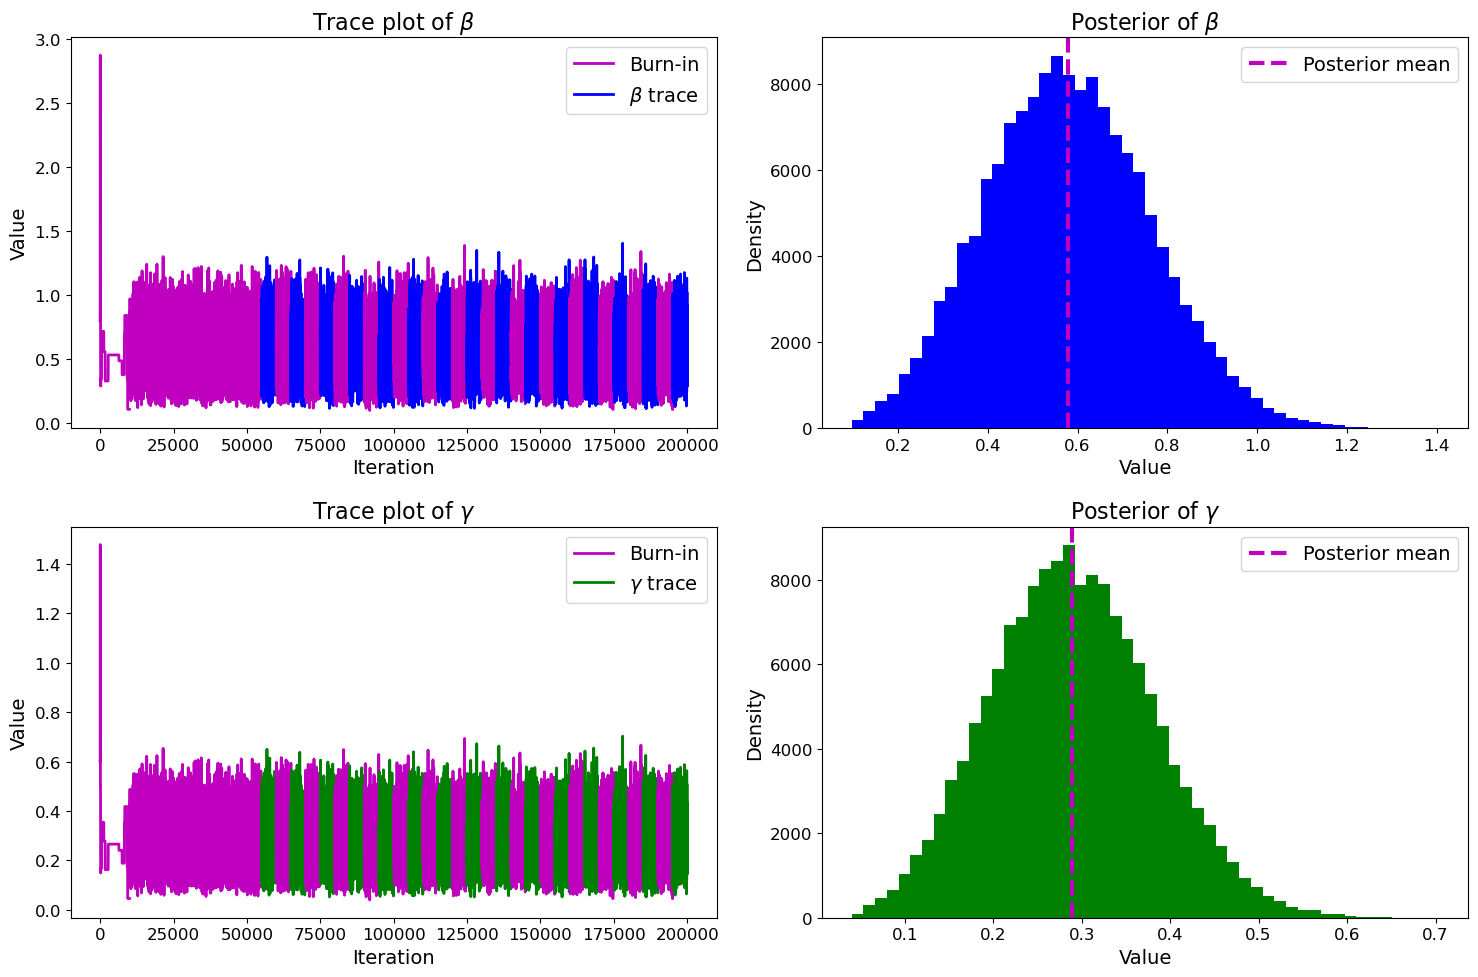

In [146]:
def log_prior(beta, gamma):
    log_prior_beta = expon.logpdf(beta, loc=0, scale=1000000)
    log_prior_gamma = truncnorm.logpdf(gamma,(a - gamma_true) / sigma_trunc,
                            (b - gamma_true) / sigma_trunc, loc=gamma_true, scale=sigma_trunc)
    log_prior = log_prior_beta + log_prior_gamma
    return log_prior


def mcmc_adaptive(tau_obs, R0_obs, n, S_init, I_init, R_init, n_iter, cov_matrix, step_size, beta_start, gamma_start):

    # set acceptance rate counter
    accept_count = 0
    
    # set current beta and gamma values as the calculated starting points
    beta_cur = beta_start
    gamma_cur = gamma_start
    
    beta_trace, gamma_trace = [beta_start], [gamma_start]
    scaled_cov_matrix = step_size * cov_matrix
    
    for i in range(n_iter):
        
        # propose new beta and gamma using a multivariate normal distribution
        beta_prop, gamma_prop = np.random.multivariate_normal([beta_cur, gamma_cur], scaled_cov_matrix)

        # calculate R0 using the proposed parameters
        R0_prop = beta_prop / gamma_prop
        # calculate R0 using the current parameters
        R0_cur = beta_cur / gamma_cur
        
        # calculate tau using the proposed parameters
        tau_prop = final_size(beta_prop, gamma_prop, S_init, I_init, R_init, t_values)
        # calculate tau using the current parameters
        tau_cur = final_size(beta_cur, gamma_cur, S_init, I_init, R_init, t_values)
        
        # calculate the log-prior using the proposed parameters
        log_prior_prop = log_prior(beta_prop, gamma_prop)
        # calculate the log-prior using the current parameters
        log_prior_cur = log_prior(beta_cur, gamma_cur)
        
        # using the simulated values found using proposed parameters, calculate the log-likelihood of observing our data
        log_like_prop = log_likelihood(tau_obs, tau_prop, n, R0_prop)
        # using the simulated values found using current parameters, calculate the log-likelihood of observing our data
        log_like_cur = log_likelihood(tau_obs, tau_cur, n, R0_cur)
        
        # calculate the log-posterior using the proposed parameters
        log_posterior_prop = log_prior_prop + log_like_prop
        # calculate the log-posterior using the current parameters
        log_posterior_cur = log_prior_cur + log_like_cur
        
        # if we accept the proposed move, update the parameters and +1 to the accept counter
        if np.random.rand() < np.exp(log_posterior_prop - log_posterior_cur):
            beta_cur, gamma_cur = beta_prop, gamma_prop
            accept_count += 1
        
        # add the current parameters to their traces
        beta_trace.append(beta_cur)
        gamma_trace.append(gamma_cur)
    
    # calculate acceptance rate
    accept_rate = accept_count / n_iter
    
    # return traces and acceptance rate
    return beta_trace, gamma_trace, accept_rate



def run_adaptive_mcmc(tau_obs, R0_obs, n, 
                S_init, I_init, R_init, n_iter, n_repeats, burn_in_runs):
    
    # set initial starting step size
    step_size = 1
    
    # set initial covariance matrix
    cov_matrix = np.eye(2)
    
    # set initial starting beta and gamma
    beta_start = 0.8
    gamma_start = 0.6
    
    # start traces tracking all draws
    beta_trace_all = []
    gamma_trace_all = []
    
    # start traces tracking all draws, after burn-ins
    beta_trace_burned_all = []
    gamma_trace_burned_all = []
    
    # set a small epsilon
    # used to prevent the covariance matrix from collapsing to 0
    epsilon = 1e-6
    
    # iterate through each run
    for repeat in range(n_repeats):
        print(f"Running iteration {repeat + 1}/{n_repeats}...")
        
        # run MCMC
        beta_trace, gamma_trace, accept_rate = mcmc_adaptive(tau_obs, R0_obs, n,
                S_init, I_init, R_init, n_iter, cov_matrix, step_size, beta_start, gamma_start)
        
        # add the traces from that run to our overall traces
        beta_trace_all.append(beta_trace)
        gamma_trace_all.append(gamma_trace)
        
        # discard the first half of the traces (burn-in)
        beta_trace_burned = beta_trace[n_iter//2:]
        gamma_trace_burned = gamma_trace[n_iter//2:]
        
        # save the burn-in traces
        beta_trace_burned_all.append(beta_trace_burned)
        gamma_trace_burned_all.append(gamma_trace_burned)
        
        # calculate the new starting point (means of traces)
        beta_start = np.mean(beta_trace_burned)
        gamma_start = np.mean(gamma_trace_burned)
        
        # calculate the empirical covariance matrix of the traces
        # add small value epsilon to prevent collapsing of covariance matrix
        traces = np.vstack((beta_trace_burned, gamma_trace_burned)).T
        cov_matrix = np.cov(traces, rowvar=False) + epsilon * np.eye(2)
        
        # adjust step size based if acceptance rate falls outside of 20-30%
        # increase step size if acceptance rate is too low
        if accept_rate < 0.2:
            step_size *= 0.8
        # decrease step size if acceptance rate is too high
        elif accept_rate > 0.3:
            step_size *= 1.2
        
        print(f"Acceptance rate: {accept_rate:.4f}")
        print(f"New step size: {step_size:.4f}")
        print(f"New starting points: beta={beta_start:.4f}, gamma={gamma_start:.4f}")
        print(f"Updated covariance matrix:\n{cov_matrix}\n")
    
    # Use traces from the runs after the burn-in phase
    beta_trace_used = beta_trace_all[burn_in_runs:]
    gamma_trace_used = gamma_trace_all[burn_in_runs:]
    
    # Flatten the burn-in traces for the used runs
    beta_trace_burned_all = [item for sublist in beta_trace_used for item in sublist]
    gamma_trace_burned_all = [item for sublist in gamma_trace_used for item in sublist]
    
    return beta_trace_all, gamma_trace_all, beta_trace_burned_all, gamma_trace_burned_all

# set number of runs of the adaptive algorithm
n_repeats = 20

# set number of iterations within each run
n_iter = 10000

# set number of runs to use as burn-in
burn_in_runs = 5

# run the adaptive MCMC
beta_trace_all, gamma_trace_all, beta_trace_burned_all, gamma_trace_burned_all = run_adaptive_mcmc(tau_obs,
                R0_obs, n, S_init, I_init, R_init, n_iter, n_repeats, burn_in_runs)

# calculate the posterior means
beta_mean = np.mean(beta_trace_burned_all)
gamma_mean = np.mean(gamma_trace_burned_all)

# plotting traces for beta and gamma
plt.figure(figsize=(15, 10))

# trace plot for beta with burn-ins highlighted in pink
plt.subplot(2, 2, 1)
for repeat in range(n_repeats):
    start_index = repeat * n_iter
    burn_in_index = start_index + n_iter // 2
    end_index = start_index + n_iter + 1
    # only add the labels for one repeat (randomly chose 10)
    if repeat == 10:
        # plot burn-in part in pink
        plt.plot(range(start_index, burn_in_index), beta_trace_all[repeat][:n_iter // 2], color='m', label=r'Burn-in')
        # plot the rest in green
        plt.plot(range(burn_in_index, end_index), beta_trace_all[repeat][n_iter // 2:], color='b',label=r'$\beta$ trace')
        
    elif repeat < burn_in_runs:
        # plot burn-in part in pink
        plt.plot(range(start_index, end_index), beta_trace_all[repeat], color='m')
    else:
        # plot burn-in part in pink
        plt.plot(range(start_index, burn_in_index), beta_trace_all[repeat][:n_iter // 2], color='m')
        # plot the rest in green
        plt.plot(range(burn_in_index, end_index), beta_trace_all[repeat][n_iter // 2:], color='b')
plt.title(r'Trace plot of $\beta$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

# posterior distribution for beta (burn-ins discarded)
plt.subplot(2, 2, 2)
plt.hist(beta_trace_burned_all, bins=50, color='b')
plt.axvline(x=beta_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\beta$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# trace plot for gamma with burn-ins highlighted in pink
plt.subplot(2, 2, 3)

for repeat in range(n_repeats):
    start_index = repeat * n_iter
    burn_in_index = start_index + n_iter // 2
    end_index = start_index + n_iter + 1
    # only add the labels for one repeat (randomly chose 10)
    if repeat == 10:
        # plot burn-in part in pink
        plt.plot(range(start_index, burn_in_index), gamma_trace_all[repeat][:n_iter // 2], color='m', label=r'Burn-in')
        # plot the rest in green
        plt.plot(range(burn_in_index, end_index), gamma_trace_all[repeat][n_iter // 2:], color='g',label=r'$\gamma$ trace')
        
    elif repeat < burn_in_runs:
        # plot burn-in part in pink
        plt.plot(range(start_index, end_index), gamma_trace_all[repeat], color='m')
    else:
        # plot burn-in part in pink
        plt.plot(range(start_index, burn_in_index), gamma_trace_all[repeat][:n_iter // 2], color='m')
        # plot the rest in green
        plt.plot(range(burn_in_index, end_index), gamma_trace_all[repeat][n_iter // 2:], color='g')
plt.title(r'Trace plot of $\gamma$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

# posterior distribution for gamma (burn-ins discarded)
plt.subplot(2, 2, 4)
plt.hist(gamma_trace_burned_all, bins=50, color='g')
plt.axvline(x=gamma_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\gamma$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig("Figures/finalsize_betagamma_adaptive_alltraces.pdf", dpi=1000, bbox_inches='tight')


## Parameterisation 2: beta and T

### Uninformative priors for both

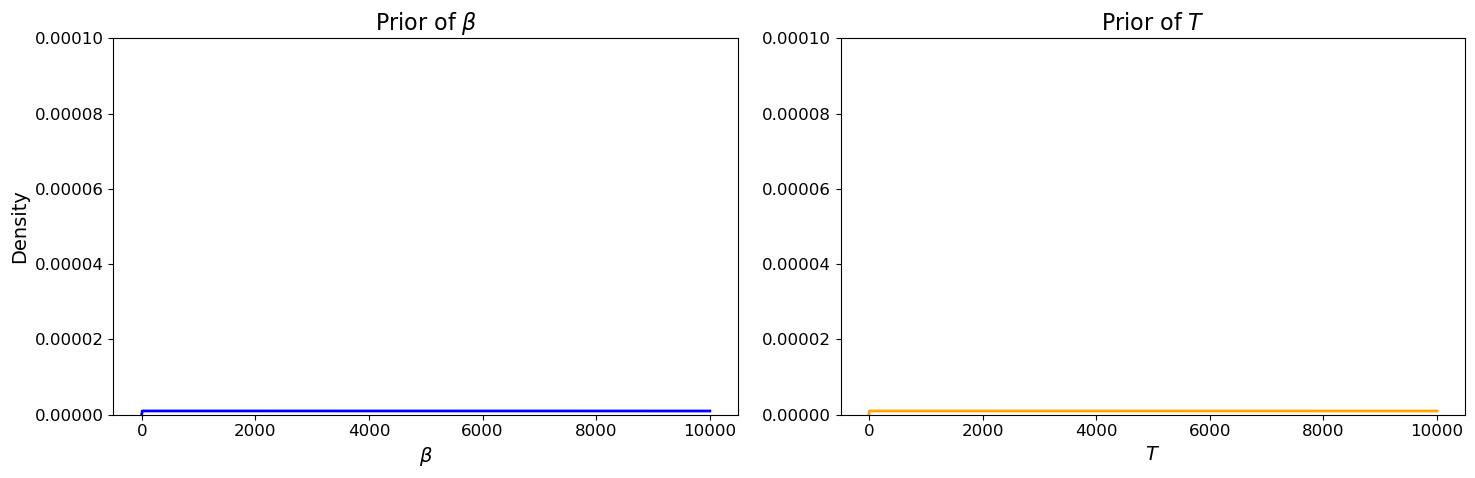

In [35]:
# define the range for each parameter
beta_range = np.linspace(-1, 10000, 1000)
T_range = np.linspace(-1, 10000, 1000)

# calculate the prior densities for each parameter
# scale is the inverse of the rate parameter lambda
beta_prior = expon.pdf(beta_range, loc=0, scale=1000000)
T_prior = expon.pdf(T_range, loc=0, scale=1000000)

# plot the priors
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(beta_range, beta_prior, 'b')
plt.title('Prior of $\\beta$')
plt.xlabel('$\\beta$')
plt.ylabel('Density')
plt.ylim(0,0.0001)

plt.subplot(1, 2, 2)
plt.plot(T_range, T_prior, 'orange')
plt.title(r'Prior of $T$')
plt.xlabel(r'$T$')
plt.ylim(0,0.0001)

plt.tight_layout()
plt.savefig("Figures/finalsize_betaT_uninformative_prior.pdf", dpi=1000, bbox_inches='tight')

Acceptance rate: 0.23484
Beta mean: 1.5987427175180189
T mean: 1.7241975513276455


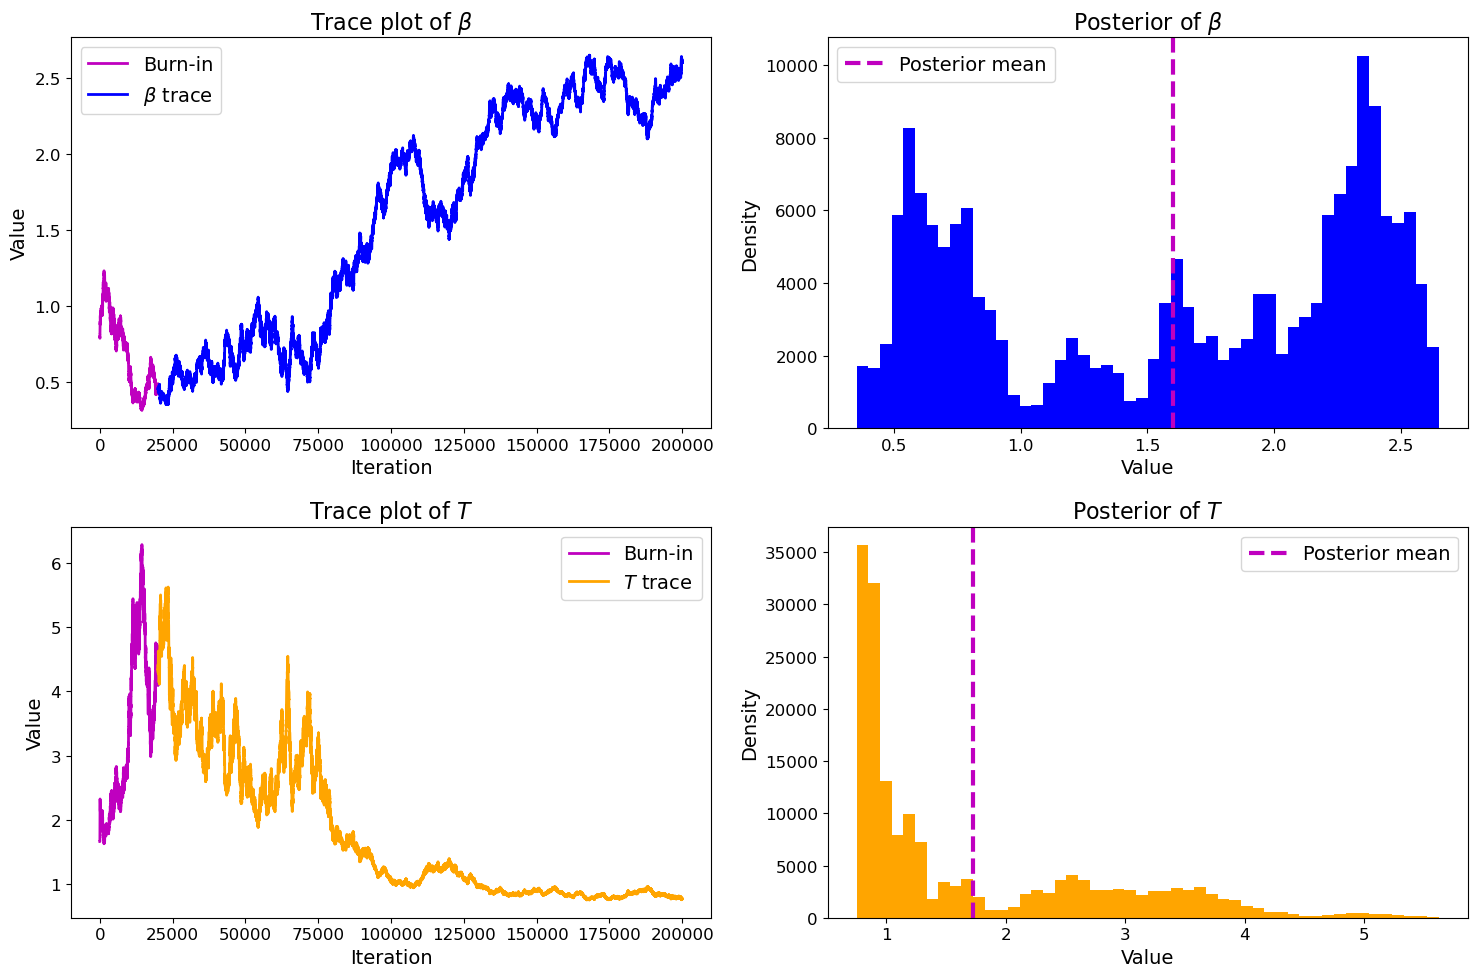

In [36]:
# calculates combined log-prior for given values of beta and T
def log_prior(beta, T):
    log_prior_beta = expon.logpdf(beta, loc=0, scale = 1000000)
    log_prior_T = expon.logpdf(T, loc=0,scale = 1000000)
    log_prior = log_prior_beta + log_prior_T
    return log_prior

def mcmc(tau_obs, R0_obs, n, S_init, I_init, R_init, n_iter, step_size_beta, step_size_T):
    # set initial values (cur stands for 'current value')
    beta_cur = 0.8
    T_cur = 1.66
    
    # initialise a counter for the number of accepted moves
    accept_count = 0
    
    # initialise arrays storing the traces for each parameter
    beta_trace, T_trace = [beta_cur], [T_cur]
    
    for i in range(n_iter):
        # draw from proposal distributions
        beta_prop = np.random.normal(beta_cur, step_size_beta)
        T_prop = np.random.normal(T_cur, step_size_T)
    
        # convert Ts to gammas
        gamma_prop = 1 / T_prop
        gamma_cur = 1 / T_cur
        
        # calculate R0 using the proposed parameters
        R0_prop = beta_prop / gamma_prop
        # calculate R0 using the current parameters
        R0_cur = beta_cur / gamma_cur
        
        # calculate tau using the proposed parameters
        tau_prop = final_size(beta_prop, gamma_prop, S_init, I_init, R_init, t_values)
        # calculate tau using the current parameters
        tau_cur = final_size(beta_cur, gamma_cur, S_init, I_init, R_init, t_values)
        
        # calculate the log-prior using the proposed parameters
        log_prior_prop = log_prior(beta_prop, T_prop)
        # calculate the log-prior using the current parameters
        log_prior_cur = log_prior(beta_cur, T_cur)
        
        # using the simulated values found using proposed parameters, calculate the log-likelihood of observing our data
        log_like_prop = log_likelihood(tau_obs, tau_prop, n, R0_prop)
        # using the simulated values found using current parameters, calculate the log-likelihood of observing our data
        log_like_cur = log_likelihood(tau_obs, tau_cur, n, R0_cur)
        
        # calculate the log-posterior using the proposed parameters
        log_posterior_prop = log_prior_prop + log_like_prop
        # calculate the log-posterior using the current parameters
        log_posterior_cur = log_prior_cur + log_like_cur
        
        # if we accept the proposed move, update the parameters and +1 to the accept counter
        if np.random.rand() < np.exp(log_posterior_prop - log_posterior_cur):
            beta_cur, T_cur = beta_prop, T_prop
            accept_count += 1
        
        # add the current parameters to their traces
        beta_trace.append(beta_cur)
        T_trace.append(T_cur)
        
    # calculate the acceptance rate
    accept_rate = accept_count / n_iter
    
    return beta_trace, T_trace, accept_rate

# set initial conditions
S_init, I_init, R_init = 0.99, 0.01, 0

# set number of iterations
n_iter = 200000

# set burn-in period
burn_in = 20000

# set step sizes
step_size_beta = 0.007
step_size_T = 0.04

# run the algorithm
beta_trace, T_trace, accept_rate = mcmc(tau_obs, R0_obs, n,
                S_init, I_init, R_init, n_iter, step_size_beta, step_size_T)

# apply burn-in
beta_trace_burn_in = beta_trace[:burn_in]
beta_trace_post_burn_in = beta_trace[burn_in:]

T_trace_burn_in = T_trace[:burn_in]
T_trace_post_burn_in = T_trace[burn_in:]

# print acceptance rate
print("Acceptance rate:", accept_rate)

# print means
beta_mean = np.mean(beta_trace_post_burn_in)
print(f"Beta mean: {beta_mean}")
T_mean = np.mean(T_trace_post_burn_in)
print(f"T mean: {T_mean}")


# plotting results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(range(burn_in), beta_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), beta_trace_post_burn_in, 'b', label=r'$\beta$ trace')
plt.title(r'Trace plot of $\beta$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(beta_trace_post_burn_in, bins=50, color='b')
plt.axvline(x=beta_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\beta$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(burn_in), T_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), T_trace_post_burn_in, 'orange', label=r'$T$ trace')
plt.title(r'Trace plot of $T$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(T_trace_post_burn_in, bins=50, color='orange')
plt.axvline(x=T_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $T$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig("Figures/finalsize_betaT_uninformative_traces.pdf", dpi=1000, bbox_inches='tight')

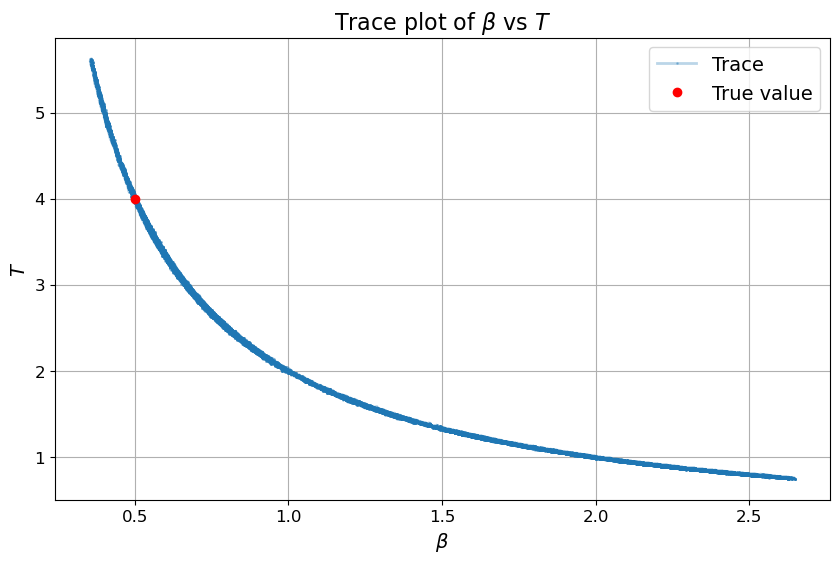

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(beta_trace_post_burn_in, T_trace_post_burn_in, 'o-', markersize=1, alpha = 0.3, label = 'Trace')
plt.plot(beta_true,T_true,'ro', label = r'True value') 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$T$')
plt.title(r'Trace plot of $\beta$ vs $T$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/finalsize_betaT_uninformative_traceplot.pdf", dpi=1000, bbox_inches='tight')

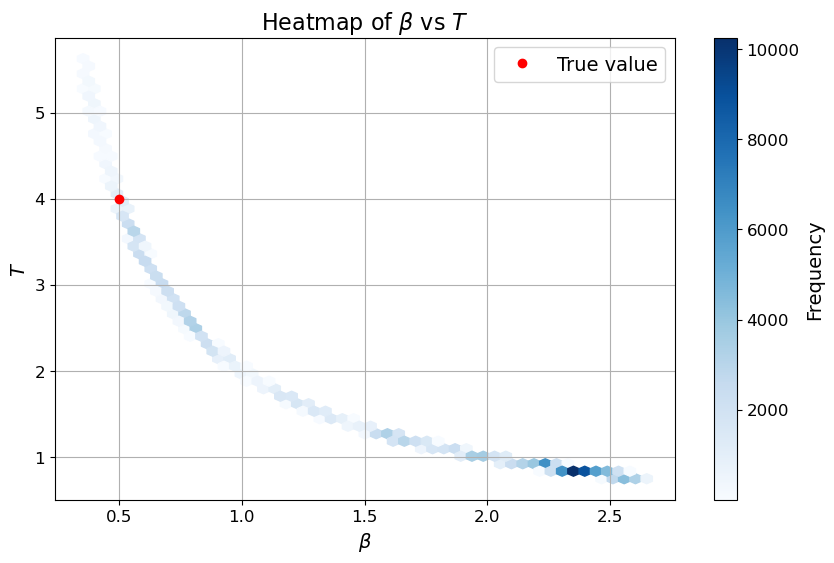

In [38]:
plt.figure(figsize=(10, 6))
plt.hexbin(beta_trace_post_burn_in, T_trace_post_burn_in, gridsize=50, cmap = 'Blues', mincnt=1)
plt.colorbar(label='Frequency')
plt.plot(beta_true,T_true,'ro', label = r'True value') 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$T$')
plt.title(r'Heatmap of $\beta$ vs $T$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/finalsize_betaT_uninformative_heatmap.pdf", dpi=1000, bbox_inches='tight')

### Informative prior for T only

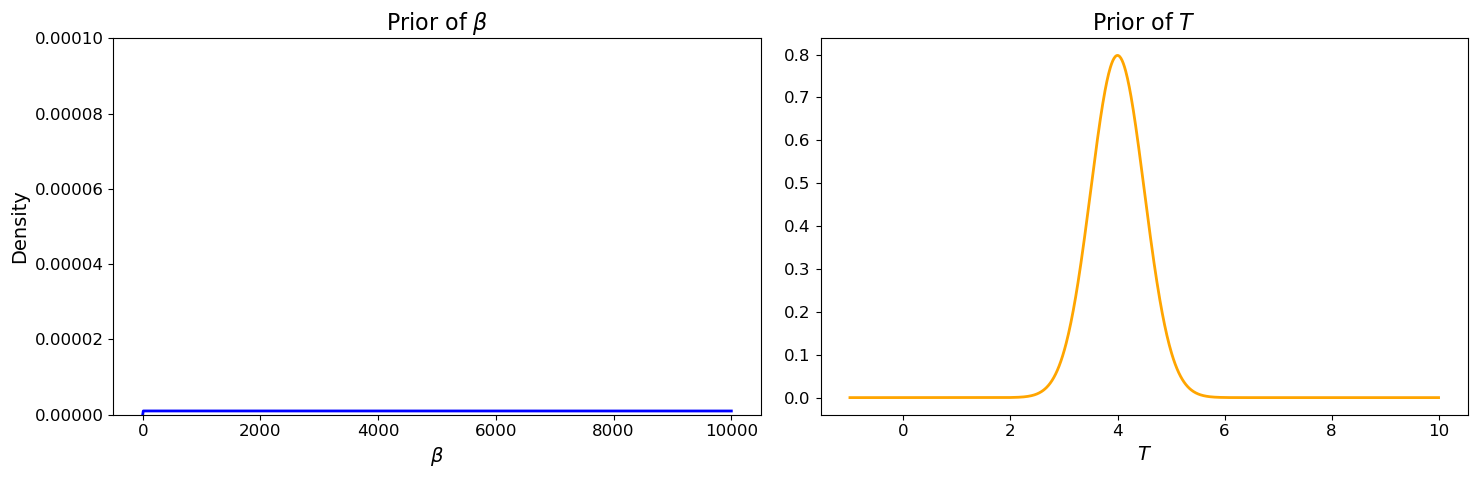

In [148]:
# define the range for each parameter
beta_range = np.linspace(-1, 10000, 1000)
T_range = np.linspace(-1, 10, 1000)

# calculate the prior densities for each parameter
# scale is the inverse of the rate parameter lambda
beta_prior = expon.pdf(beta_range, loc=0, scale=1000000)
a,b = 0,np.inf
sigma_trunc = 0.5
T_prior = truncnorm.pdf(T_range, (a - T_true) / sigma_trunc,
                            (b - T_true) / sigma_trunc, loc=T_true, scale=sigma_trunc)

# plot the priors
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(beta_range, beta_prior, 'b')
plt.title('Prior of $\\beta$')
plt.xlabel('$\\beta$')
plt.ylabel('Density')
plt.ylim(0,0.0001)

plt.subplot(1, 2, 2)
plt.plot(T_range, T_prior, 'orange')
plt.title(r'Prior of $T$')
plt.xlabel(r'$T$')

plt.tight_layout()
plt.savefig("Figures/finalsize_betaT_informative_prior.pdf", dpi=1000, bbox_inches='tight')

Acceptance rate: 0.25249
Beta mean: 0.5098454045993405
T mean: 3.9713892313617456


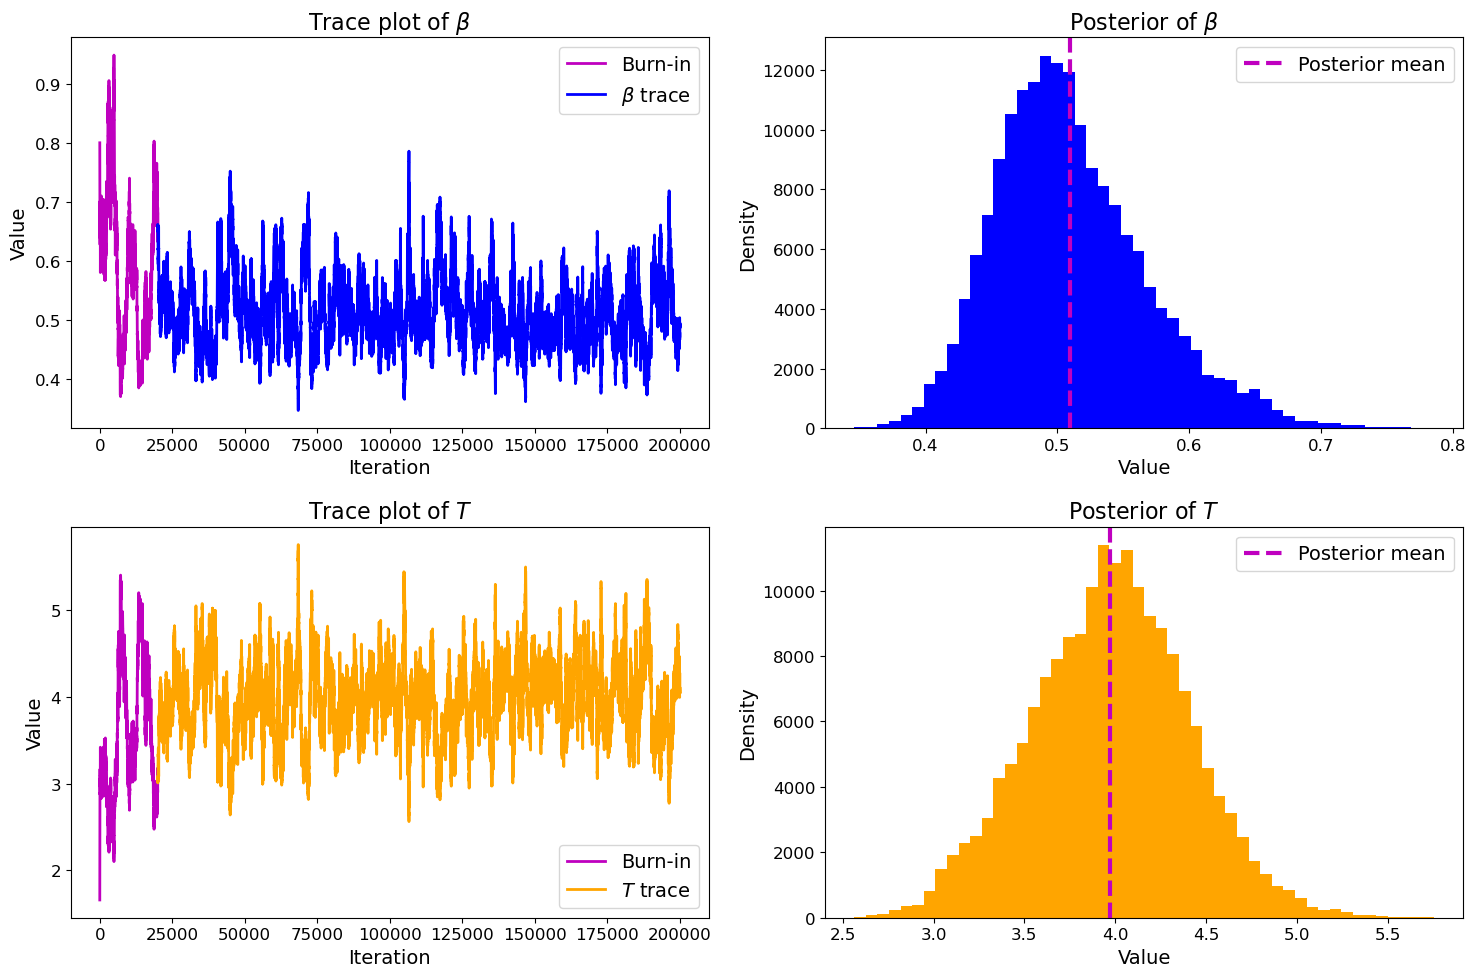

In [40]:
# calculates combined log-prior for given values of beta and T
def log_prior(beta, T):
    log_prior_beta = expon.logpdf(beta, loc=0, scale=1000000)
    log_prior_T = truncnorm.logpdf(T,(a - T_true) / sigma_trunc,
                        (b - T_true) / sigma_trunc, loc=T_true, scale=sigma_trunc)
    log_prior = log_prior_beta + log_prior_T
    return log_prior

def mcmc(tau_obs, R0_obs, n, S_init, I_init, R_init, n_iter, step_size_beta, step_size_T):
    # set initial values (cur stands for 'current value')
    beta_cur = 0.8
    T_cur = 1.66
    
    # initialise a counter for the number of accepted moves
    accept_count = 0
    
    # initialise arrays storing the traces for each parameter
    beta_trace, T_trace = [beta_cur], [T_cur]
    
    for i in range(n_iter):
        # draw from proposal distributions
        beta_prop = np.random.normal(beta_cur, step_size_beta)
        T_prop = np.random.normal(T_cur, step_size_T)
        
        # convert Ts to gammas
        gamma_prop = 1 / T_prop
        gamma_cur = 1 / T_cur
        
        # calculate R0 using the proposed parameters
        R0_prop = beta_prop / gamma_prop
        # calculate R0 using the current parameters
        R0_cur = beta_cur / gamma_cur
        
        # calculate tau using the proposed parameters
        tau_prop = final_size(beta_prop, gamma_prop, S_init, I_init, R_init, t_values)
        # calculate tau using the current parameters
        tau_cur = final_size(beta_cur, gamma_cur, S_init, I_init, R_init, t_values)
        
        # calculate the log-prior using the proposed parameters
        log_prior_prop = log_prior(beta_prop, T_prop)
        # calculate the log-prior using the current parameters
        log_prior_cur = log_prior(beta_cur, T_cur)
        
        # using the simulated values found using proposed parameters, calculate the log-likelihood of observing our data
        log_like_prop = log_likelihood(tau_obs, tau_prop, n, R0_prop)
        # using the simulated values found using current parameters, calculate the log-likelihood of observing our data
        log_like_cur = log_likelihood(tau_obs, tau_cur, n, R0_cur)
        
        # calculate the log-posterior using the proposed parameters
        log_posterior_prop = log_prior_prop + log_like_prop
        # calculate the log-posterior using the current parameters
        log_posterior_cur = log_prior_cur + log_like_cur
        
        # if we accept the proposed move, update the parameters and +1 to the accept counter
        if np.random.rand() < np.exp(log_posterior_prop - log_posterior_cur):
            beta_cur, T_cur = beta_prop, T_prop
            accept_count += 1
        
        # add the current parameters to their traces
        beta_trace.append(beta_cur)
        T_trace.append(T_cur)
        
    # calculate the acceptance rate
    accept_rate = accept_count / n_iter
    
    return beta_trace, T_trace, accept_rate

# set initial conditions
S_init, I_init, R_init = 0.99, 0.01, 0

# set number of iterations
n_iter = 200000

# set burn-in period
burn_in = 20000

# set step sizes
step_size_beta = 0.01
step_size_T = 0.06

# run the algorithm
beta_trace, T_trace, accept_rate = mcmc(tau_obs, R0_obs, n,
                S_init, I_init, R_init, n_iter, step_size_beta, step_size_T)

# apply burn-in
beta_trace_burn_in = beta_trace[:burn_in]
beta_trace_post_burn_in = beta_trace[burn_in:]

T_trace_burn_in = T_trace[:burn_in]
T_trace_post_burn_in = T_trace[burn_in:]

# print acceptance rate
print("Acceptance rate:", accept_rate)

# print means
beta_mean = np.mean(beta_trace_post_burn_in)
print(f"Beta mean: {beta_mean}")
T_mean = np.mean(T_trace_post_burn_in)
print(f"T mean: {T_mean}")


# plotting results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(range(burn_in), beta_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), beta_trace_post_burn_in, 'b', label=r'$\beta$ trace')
plt.title(r'Trace plot of $\beta$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(beta_trace_post_burn_in, bins=50, color='b')
plt.axvline(x=beta_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\beta$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(burn_in), T_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), T_trace_post_burn_in, 'orange', label=r'$T$ trace')
plt.title(r'Trace plot of $T$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(T_trace_post_burn_in, bins=50, color='orange')
plt.axvline(x=T_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $T$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig("Figures/finalsize_betaT_informative_traces.pdf", dpi=1000, bbox_inches='tight')

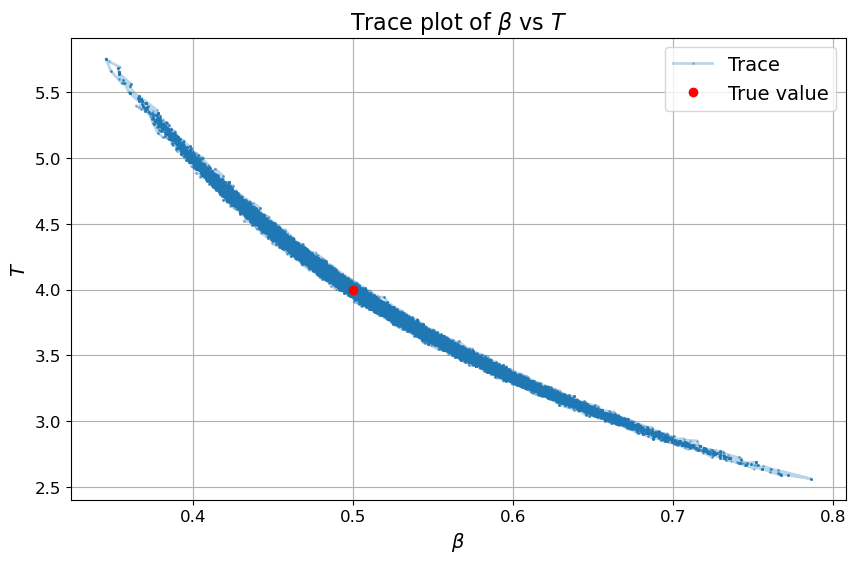

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(beta_trace_post_burn_in, T_trace_post_burn_in, 'o-', markersize=1, alpha = 0.3, label = 'Trace')
plt.plot(beta_true,T_true,'ro', label = r'True value') 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$T$')
plt.title(r'Trace plot of $\beta$ vs $T$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/finalsize_betaT_informative_traceplot.pdf", dpi=1000, bbox_inches='tight')

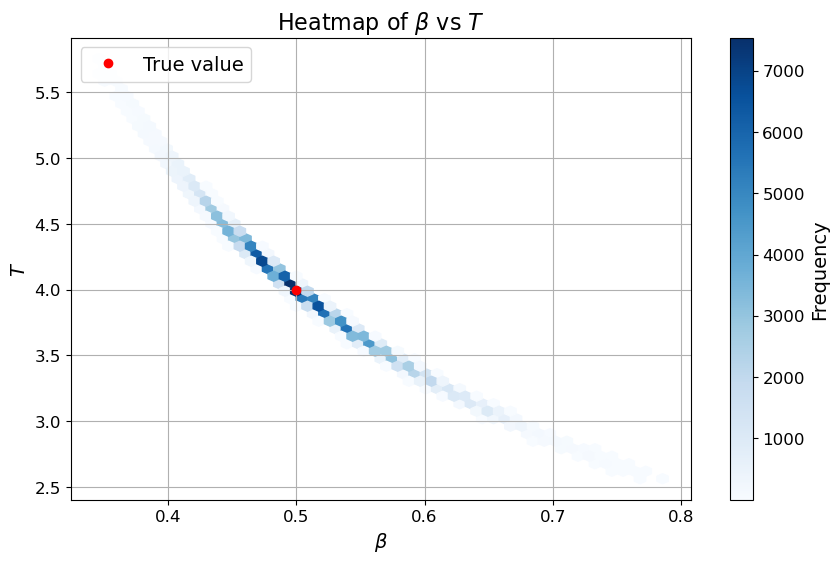

In [42]:
plt.figure(figsize=(10, 6))
plt.hexbin(beta_trace_post_burn_in, T_trace_post_burn_in, gridsize=50, cmap = 'Blues', mincnt=1)
plt.colorbar(label='Frequency')
plt.plot(beta_true,T_true,'ro', label = r'True value') 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$T$')
plt.title(r'Heatmap of $\beta$ vs $T$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/finalsize_betaT_informative_heatmap.pdf", dpi=1000, bbox_inches='tight')

### Adaptive proposal distribution

Running iteration 1/20...


C:\Users\besso\AppData\Local\Temp\ipykernel_2168\1840370889.py:56: RuntimeWarning: overflow encountered in exp
  if np.random.rand() < np.exp(log_posterior_prop - log_posterior_cur):
C:\Users\besso\AppData\Local\Temp\ipykernel_2168\3752043509.py:4: RuntimeWarning: overflow encountered in scalar multiply
  dSdt = -beta * S * I
C:\Users\besso\AppData\Local\Temp\ipykernel_2168\3752043509.py:5: RuntimeWarning: overflow encountered in scalar multiply
  dIdt = beta * S * I - gamma * I
C:\Users\besso\AppData\Local\Temp\ipykernel_2168\3752043509.py:6: RuntimeWarning: overflow encountered in scalar multiply
  dRdt = gamma * I
C:\Users\besso\anaconda3\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\besso\AppData\Local\Temp\ipykernel_2168\2389052579.py:16: RuntimeWarning: invalid value encountered in log
  log_V = (np.log(tau_

Acceptance rate: 0.0034
New step size: 0.8000
New starting points: beta=5.4162, T=0.3712
Updated covariance matrix:
[[ 0.27864884 -0.019548  ]
 [-0.019548    0.00139134]]

Running iteration 2/20...
Acceptance rate: 0.1017
New step size: 0.6400
New starting points: beta=8.2900, T=0.2421
Updated covariance matrix:
[[ 2.19630343e-01 -6.86117393e-03]
 [-6.86117393e-03  2.18011227e-04]]

Running iteration 3/20...
Acceptance rate: 0.4915
New step size: 0.7680
New starting points: beta=7.7942, T=0.2594
Updated covariance matrix:
[[ 0.63903504 -0.02106954]
 [-0.02106954  0.00070443]]

Running iteration 4/20...
Acceptance rate: 0.3124
New step size: 0.9216
New starting points: beta=8.0726, T=0.2514
Updated covariance matrix:
[[ 0.8950952  -0.02873914]
 [-0.02873914  0.00094576]]

Running iteration 5/20...
Acceptance rate: 0.2110
New step size: 0.9216
New starting points: beta=7.9331, T=0.2555
Updated covariance matrix:
[[ 0.8132159  -0.0269469 ]
 [-0.0269469   0.00092037]]

Running iteration 6/

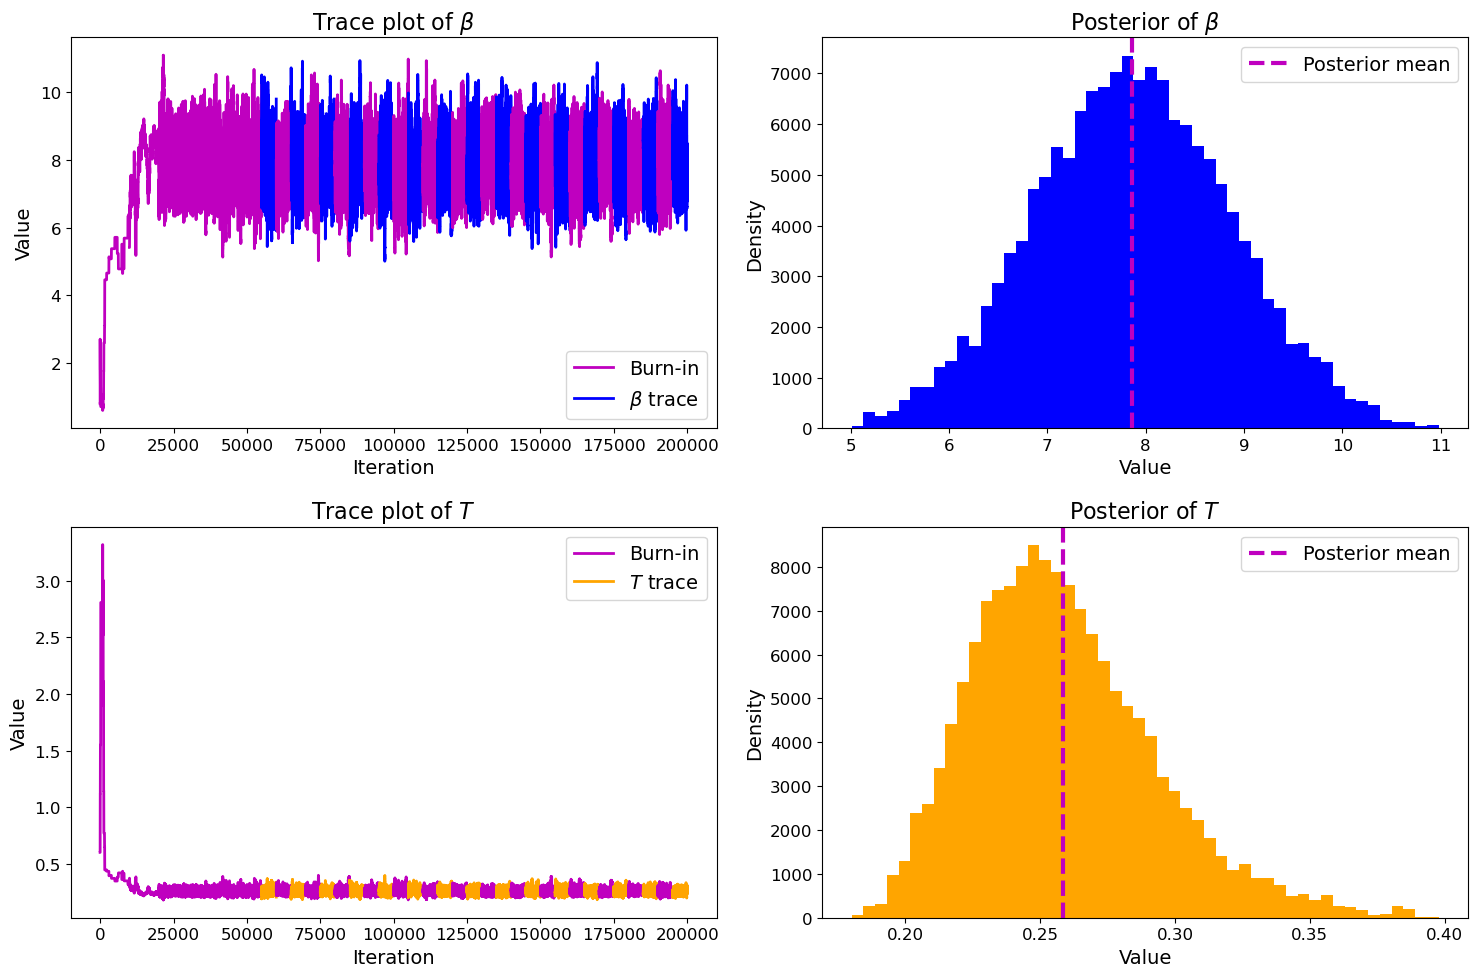

In [150]:
# calculates combined log-prior for given values of beta and T
def log_prior(beta, T):
    log_prior_beta = expon.logpdf(beta, loc=0, scale=1000000)
    log_prior_T = truncnorm.logpdf(T,(a - T_true) / sigma_trunc,
                        (b - T_true) / sigma_trunc, loc=T_true, scale=sigma_trunc)
    log_prior = log_prior_beta + log_prior_T
    return log_prior

def mcmc_adaptive(tau_obs, R0_obs, n, S_init, I_init, R_init, n_iter, cov_matrix, step_size, beta_start, T_start):

    # set acceptance rate counter
    accept_count = 0
    
    # set current beta and T values as the calculated starting points
    beta_cur = beta_start
    T_cur = T_start
    
    beta_trace, T_trace = [beta_start], [T_start]
    scaled_cov_matrix = step_size * cov_matrix
    
    for i in range(n_iter):
        
        # propose new beta and gamma using a multivariate normal distribution
        beta_prop, T_prop = np.random.multivariate_normal([beta_cur, T_cur], scaled_cov_matrix)
        
        # calculate gammas
        gamma_prop = 1 / T_prop
        gamma_cur = 1 / T_cur
        
        # calculate R0 using the proposed parameters
        R0_prop = beta_prop / gamma_prop
        # calculate R0 using the current parameters
        R0_cur = beta_cur / gamma_cur
        
        # calculate tau using the proposed parameters
        tau_prop = final_size(beta_prop, gamma_prop, S_init, I_init, R_init, t_values)
        # calculate tau using the current parameters
        tau_cur = final_size(beta_cur, gamma_cur, S_init, I_init, R_init, t_values)
        
        # calculate the log-prior using the proposed parameters
        log_prior_prop = log_prior(beta_prop, gamma_prop)
        # calculate the log-prior using the current parameters
        log_prior_cur = log_prior(beta_cur, gamma_cur)
        
        # using the simulated values found using proposed parameters, calculate the log-likelihood of observing our data
        log_like_prop = log_likelihood(tau_obs, tau_prop, n, R0_prop)
        # using the simulated values found using current parameters, calculate the log-likelihood of observing our data
        log_like_cur = log_likelihood(tau_obs, tau_cur, n, R0_cur)
        
        # calculate the log-posterior using the proposed parameters
        log_posterior_prop = log_prior_prop + log_like_prop
        # calculate the log-posterior using the current parameters
        log_posterior_cur = log_prior_cur + log_like_cur
        
        # if we accept the proposed move, update the parameters and +1 to the accept counter
        if np.random.rand() < np.exp(log_posterior_prop - log_posterior_cur):
            beta_cur, T_cur = beta_prop, T_prop
            accept_count += 1
        
        # add the current parameters to their traces
        beta_trace.append(beta_cur)
        T_trace.append(T_cur)
    
    # calculate acceptance rate
    accept_rate = accept_count / n_iter
    
    # return traces and acceptance rate
    return beta_trace, T_trace, accept_rate


def run_adaptive_mcmc(tau_obs, R0_obs, n, 
                S_init, I_init, R_init, n_iter, n_repeats, burn_in_runs):
    
    # set initial starting step size
    step_size = 1
    
    # set initial covariance matrix
    cov_matrix = np.eye(2)
    
    # set initial starting beta and T
    beta_start = 0.8
    T_start = 0.6
    
    # start traces tracking all draws
    beta_trace_all = []
    T_trace_all = []
    
    # start traces tracking all draws, after burn-ins
    beta_trace_burned_all = []
    T_trace_burned_all = []
    
    # set a small epsilon
    # used to prevent the covariance matrix from collapsing to 0
    epsilon = 1e-6
    
    # iterate through each run
    for repeat in range(n_repeats):
        print(f"Running iteration {repeat + 1}/{n_repeats}...")
        
        # run MCMC
        beta_trace, T_trace, accept_rate = mcmc_adaptive(tau_obs, R0_obs, n,
                S_init, I_init, R_init, n_iter, cov_matrix, step_size, beta_start, T_start)
        
        # add the traces from that run to our overall traces
        beta_trace_all.append(beta_trace)
        T_trace_all.append(T_trace)
        
        # discard the first half of the traces (burn-in)
        beta_trace_burned = beta_trace[n_iter//2:]
        T_trace_burned = T_trace[n_iter//2:]
        
        # save the burn-in traces
        beta_trace_burned_all.append(beta_trace_burned)
        T_trace_burned_all.append(T_trace_burned)
        
        # calculate the new starting point (means of traces)
        beta_start = np.mean(beta_trace_burned)
        T_start = np.mean(T_trace_burned)
        
        # calculate the empirical covariance matrix of the traces
        # add small value epsilon to prevent collapsing of covariance matrix
        traces = np.vstack((beta_trace_burned, T_trace_burned)).T
        cov_matrix = np.cov(traces, rowvar=False) + epsilon * np.eye(2)
        
        # adjust step size based if acceptance rate falls outside of 20-30%
        # increase step size if acceptance rate is too low
        if accept_rate < 0.2:
            step_size *= 0.8
        # decrease step size if acceptance rate is too high
        elif accept_rate > 0.3:
            step_size *= 1.2
        
        print(f"Acceptance rate: {accept_rate:.4f}")
        print(f"New step size: {step_size:.4f}")
        print(f"New starting points: beta={beta_start:.4f}, T={T_start:.4f}")
        print(f"Updated covariance matrix:\n{cov_matrix}\n")
    
    # Use traces from the runs after the burn-in phase
    beta_trace_used = beta_trace_all[burn_in_runs:]
    T_trace_used = T_trace_all[burn_in_runs:]
    
    # Flatten the burn-in traces for the used runs
    beta_trace_burned_all = [item for sublist in beta_trace_used for item in sublist]
    T_trace_burned_all = [item for sublist in T_trace_used for item in sublist]
    
    return beta_trace_all, T_trace_all, beta_trace_burned_all, T_trace_burned_all

# set number of runs of the adaptive algorithm
n_repeats = 20

# set number of iterations within each run
n_iter = 10000

# set number of runs to use as burn-in
burn_in_runs = 5

# run the adaptive MCMC
beta_trace_all, T_trace_all, beta_trace_burned_all, T_trace_burned_all = run_adaptive_mcmc(tau_obs,
                R0_obs, n, S_init, I_init, R_init, n_iter, n_repeats, burn_in_runs)

# calculate the posterior means
beta_mean = np.mean(beta_trace_burned_all)
T_mean = np.mean(T_trace_burned_all)

# plotting traces for beta and T
plt.figure(figsize=(15, 10))

# trace plot for beta with burn-ins highlighted in pink
plt.subplot(2, 2, 1)
for repeat in range(n_repeats):
    start_index = repeat * n_iter
    burn_in_index = start_index + n_iter // 2
    end_index = start_index + n_iter + 1
    # only add the labels for one repeat (randomly chose 10)
    if repeat == 10:
        # plot burn-in part in pink
        plt.plot(range(start_index, burn_in_index), beta_trace_all[repeat][:n_iter // 2], color='m', label=r'Burn-in')
        # plot the rest in green
        plt.plot(range(burn_in_index, end_index), beta_trace_all[repeat][n_iter // 2:], color='b',label=r'$\beta$ trace')
        
    elif repeat < burn_in_runs:
        # plot burn-in part in pink
        plt.plot(range(start_index, end_index), beta_trace_all[repeat], color='m')
    else:
        # plot burn-in part in pink
        plt.plot(range(start_index, burn_in_index), beta_trace_all[repeat][:n_iter // 2], color='m')
        # plot the rest in green
        plt.plot(range(burn_in_index, end_index), beta_trace_all[repeat][n_iter // 2:], color='b')
plt.title(r'Trace plot of $\beta$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

# posterior distribution for beta (burn-ins discarded)
plt.subplot(2, 2, 2)
plt.hist(beta_trace_burned_all, bins=50, color='b')
plt.axvline(x=beta_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $\beta$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# trace plot for T with burn-ins highlighted in pink
plt.subplot(2, 2, 3)

for repeat in range(n_repeats):
    start_index = repeat * n_iter
    burn_in_index = start_index + n_iter // 2
    end_index = start_index + n_iter + 1
    # only add the labels for one repeat (randomly chose 10)
    if repeat == 10:
        # plot burn-in part in pink
        plt.plot(range(start_index, burn_in_index), T_trace_all[repeat][:n_iter // 2], color='m', label=r'Burn-in')
        # plot the rest in green
        plt.plot(range(burn_in_index, end_index), T_trace_all[repeat][n_iter // 2:], color='orange',label=r'$T$ trace')
        
    elif repeat < burn_in_runs:
        # plot burn-in part in pink
        plt.plot(range(start_index, end_index), T_trace_all[repeat], color='m')
    else:
        # plot burn-in part in pink
        plt.plot(range(start_index, burn_in_index), T_trace_all[repeat][:n_iter // 2], color='m')
        # plot the rest in green
        plt.plot(range(burn_in_index, end_index), T_trace_all[repeat][n_iter // 2:], color='orange')
plt.title(r'Trace plot of $T$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

# posterior distribution for T (burn-ins discarded)
plt.subplot(2, 2, 4)
plt.hist(T_trace_burned_all, bins=50, color='orange')
plt.axvline(x=T_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $T$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig("Figures/finalsize_betaT_adaptive_alltraces.pdf", dpi=1000, bbox_inches='tight')

## Parameterisation 3: R0 and T

### Uninformative priors for both

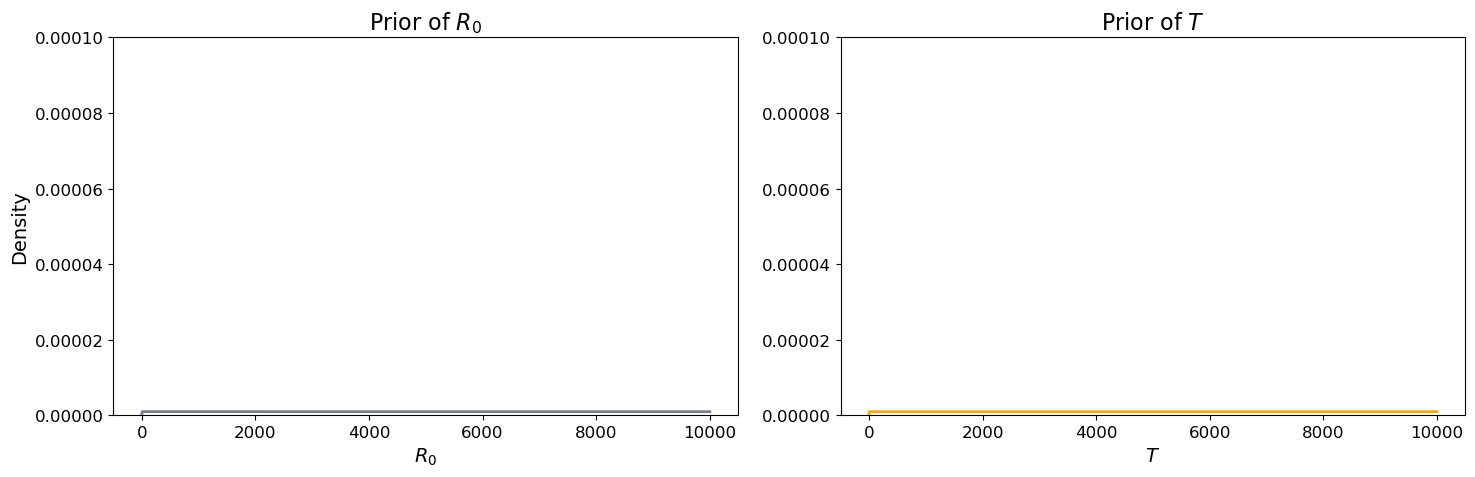

In [43]:
# define the range for each parameter
R0_range = np.linspace(-1, 10000, 1000)
T_range = np.linspace(-1, 10000, 1000)

# calculate the prior densities for each parameter
# scale is the inverse of the rate parameter lambda
R0_prior = expon.pdf(R0_range, loc=0, scale=1000000)
T_prior = expon.pdf(T_range, loc=0, scale=1000000)

# plot the priors
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(R0_range, R0_prior, 'slategrey')
plt.title(r'Prior of $R_0$')
plt.xlabel(r'$R_0$')
plt.ylabel('Density')
plt.ylim(0,0.0001)

plt.subplot(1, 2, 2)
plt.plot(T_range, T_prior, 'orange')
plt.title(r'Prior of $T$')
plt.xlabel(r'$T$')
plt.ylim(0,0.0001)

plt.tight_layout()
plt.savefig("Figures/finalsize_R0T_uninformative_prior.pdf", dpi=1000, bbox_inches='tight')

C:\Users\besso\AppData\Local\Temp\ipykernel_2168\2389052579.py:16: RuntimeWarning: invalid value encountered in log
  log_V = (np.log(tau_sim) + np.log(1 - tau_sim) + np.log(1 + ((1 - tau_sim) * (R0_sim**2)))
C:\Users\besso\AppData\Local\Temp\ipykernel_2168\2389052579.py:17: RuntimeWarning: invalid value encountered in log
  - np.log(n) - 2 * np.log(1 - ((1 - tau_sim) * R0_sim)))


Acceptance rate: 0.211515
R0 mean: 2.05233123781274
T mean: 12.443070931294603


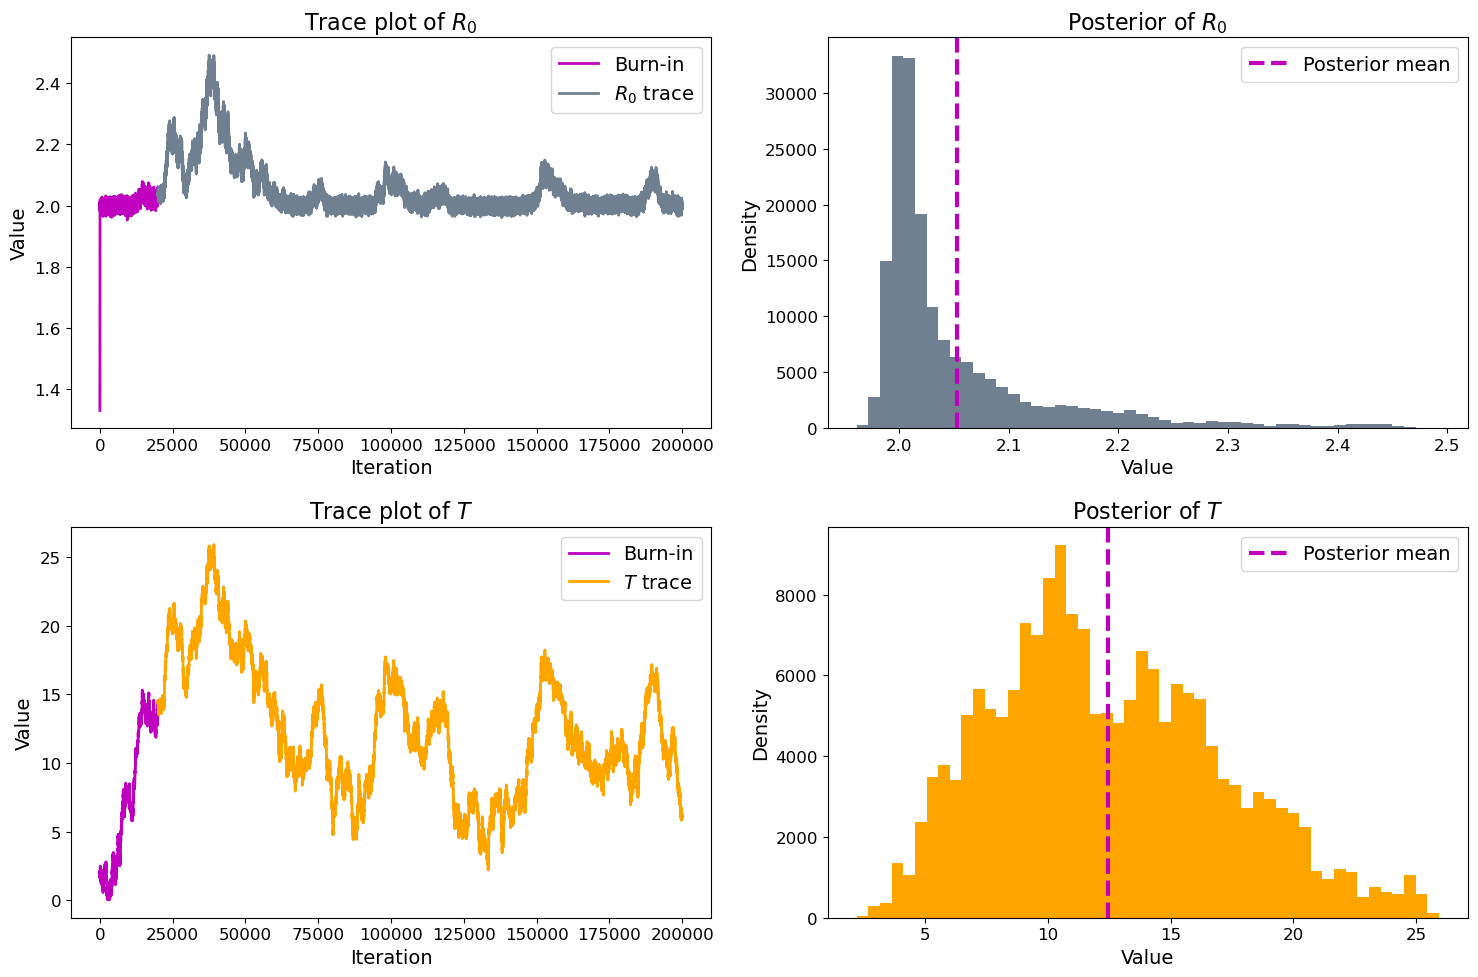

In [44]:
# calculates combined log-prior for given values of beta and T
def log_prior(R0, T):
    log_prior_R0 = expon.logpdf(R0, loc=0, scale=1000000)
    log_prior_T = expon.logpdf(T, loc = 0, scale=1000000)
    log_prior = log_prior_R0 + log_prior_T
    return log_prior

def mcmc(tau_obs, R0_obs, n, S_init, I_init, R_init, n_iter, step_size_R0, step_size_T):
    # set initial values (cur stands for 'current value')
    R0_cur = 1.33
    T_cur = 1.66
    
    # initialise a counter for the number of accepted moves
    accept_count = 0
    
    # initialise arrays storing the traces for each parameter
    R0_trace, T_trace = [R0_cur], [T_cur]
    
    for i in range(n_iter):
        # draw from proposal distributions
        R0_prop = np.random.normal(R0_cur, step_size_R0)
        T_prop = np.random.normal(T_cur, step_size_T)
        
        # convert to betas and gammas
        gamma_prop = 1 / T_prop
        gamma_cur = 1 / T_cur
        
        beta_prop = R0_prop * gamma_prop
        beta_cur = R0_cur * gamma_cur
        
        # can skip this step as we already have R0_prop and R0_cur
#         # calculate R0 using the proposed parameters
#         R0_prop = beta_prop / gamma_prop
#         # calculate R0 using the current parameters
#         R0_cur = beta_cur / gamma_cur
        
        # calculate tau using the proposed parameters
        tau_prop = final_size(beta_prop, gamma_prop, S_init, I_init, R_init, t_values)
        # calculate tau using the current parameters
        tau_cur = final_size(beta_cur, gamma_cur, S_init, I_init, R_init, t_values)
        
        # calculate the log-prior using the proposed parameters
        log_prior_prop = log_prior(R0_prop, T_prop)
        # calculate the log-prior using the current parameters
        log_prior_cur = log_prior(R0_cur, T_cur)
        
        # using the simulated values found using proposed parameters, calculate the log-likelihood of observing our data
        log_like_prop = log_likelihood(tau_obs, tau_prop, n, R0_prop)
        # using the simulated values found using current parameters, calculate the log-likelihood of observing our data
        log_like_cur = log_likelihood(tau_obs, tau_cur, n, R0_cur)
        
        # calculate the log-posterior using the proposed parameters
        log_posterior_prop = log_prior_prop + log_like_prop
        # calculate the log-posterior using the current parameters
        log_posterior_cur = log_prior_cur + log_like_cur
        
        # if we accept the proposed move, update the parameters and +1 to the accept counter
        if np.random.rand() < np.exp(log_posterior_prop - log_posterior_cur):
            R0_cur, T_cur = R0_prop, T_prop
            accept_count += 1
        
        # add the current parameters to their traces
        R0_trace.append(R0_cur)
        T_trace.append(T_cur)
        
    # calculate the acceptance rate
    accept_rate = accept_count / n_iter
    
    return R0_trace, T_trace, accept_rate

# set initial conditions
S_init, I_init, R_init = 0.99, 0.01, 0

# set number of iterations
n_iter = 200000

# set burn-in period
burn_in = 20000

# set step sizes
step_size_R0 = 0.06
step_size_T = 0.1

# run the algorithm
R0_trace, T_trace, accept_rate = mcmc(tau_obs, R0_obs, n,
                S_init, I_init, R_init, n_iter, step_size_R0, step_size_T)

# apply burn-in
R0_trace_burn_in = R0_trace[:burn_in]
R0_trace_post_burn_in = R0_trace[burn_in:]

T_trace_burn_in = T_trace[:burn_in]
T_trace_post_burn_in = T_trace[burn_in:]

# print acceptance rate
print("Acceptance rate:", accept_rate)

# print means
R0_mean = np.mean(R0_trace_post_burn_in)
print(f"R0 mean: {R0_mean}")
T_mean = np.mean(T_trace_post_burn_in)
print(f"T mean: {T_mean}")


# plotting results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(range(burn_in), R0_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), R0_trace_post_burn_in, 'slategrey', label=r'$R_0$ trace')
plt.title(r'Trace plot of $R_0$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(R0_trace_post_burn_in, bins=50, color='slategrey')
plt.axvline(x=R0_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $R_0$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(burn_in), T_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), T_trace_post_burn_in, 'orange', label=r'$T$ trace')
plt.title(r'Trace plot of $T$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(T_trace_post_burn_in, bins=50, color='orange')
plt.axvline(x=T_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $T$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig("Figures/finalsize_R0T_uninformative_traces.pdf", dpi=1000, bbox_inches='tight')

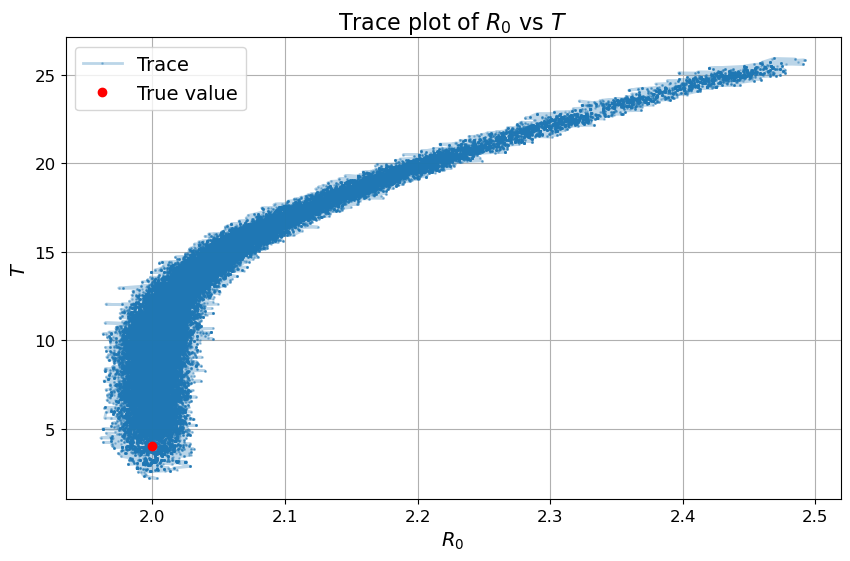

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(R0_trace_post_burn_in, T_trace_post_burn_in, 'o-', markersize=1, alpha = 0.3, label = 'Trace')
plt.plot(R0_true,T_true,'ro', label = r'True value') 
plt.xlabel(r'$R_0$')
plt.ylabel(r'$T$')
plt.title(r'Trace plot of $R_0$ vs $T$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/finalsize_R0T_uninformative_traceplot.pdf", dpi=1000, bbox_inches='tight')

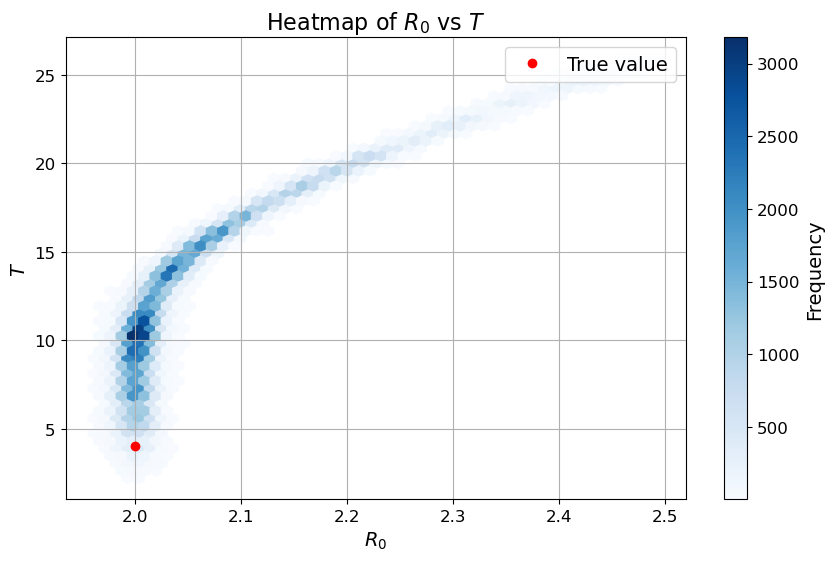

In [46]:
plt.figure(figsize=(10, 6))
plt.hexbin(R0_trace_post_burn_in, T_trace_post_burn_in, gridsize=50, cmap = 'Blues', mincnt=1)
plt.colorbar(label='Frequency')
plt.plot(R0_true,T_true,'ro', label = r'True value') 
plt.xlabel(r'$R_0$')
plt.ylabel(r'$T$')
plt.title(r'Heatmap of $R_0$ vs $T$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/finalsize_R0T_uninformative_heatmap.pdf", dpi=1000, bbox_inches='tight')

### Informative prior for T only

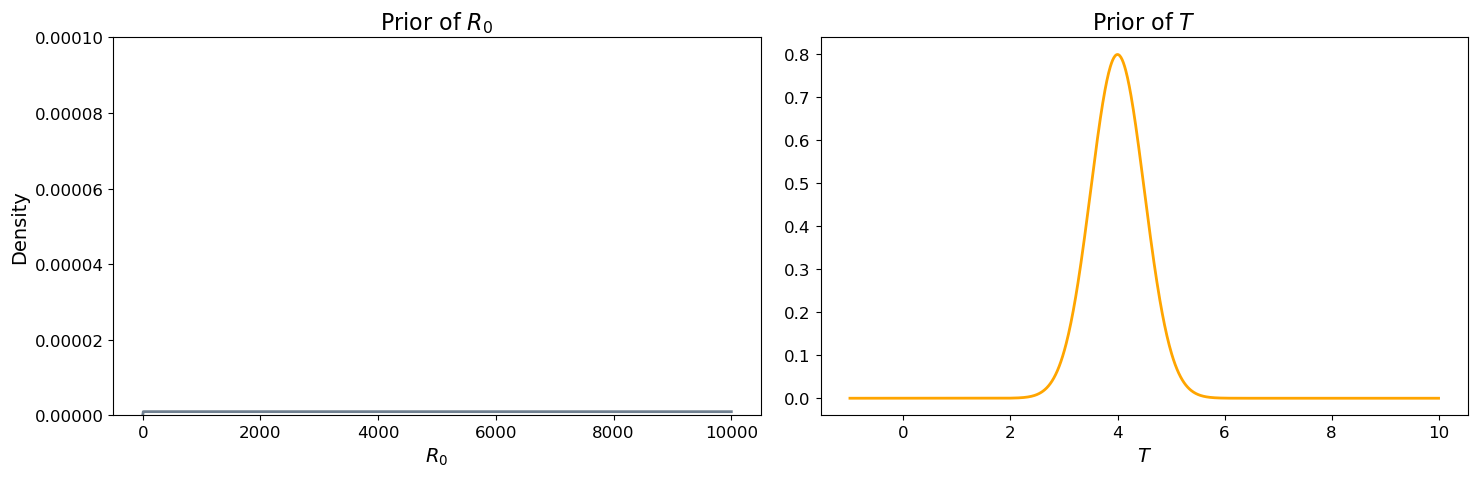

In [47]:
# define the range for each parameter
R0_range = np.linspace(-1, 10000, 1000)
T_range = np.linspace(-1, 10, 1000)

# calculate the prior densities for each parameter
# scale is the inverse of the rate parameter lambda
R0_prior = expon.pdf(R0_range, loc=0, scale=1000000)
a,b = 0,np.inf
sigma_trunc = 0.5
T_prior = truncnorm.pdf(T_range, (a - T_true) / sigma_trunc,
                            (b - T_true) / sigma_trunc, loc=T_true, scale=sigma_trunc)

# plot the priors
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(R0_range, R0_prior, 'slategrey')
plt.title(r'Prior of $R_0$')
plt.xlabel(r'$R_0$')
plt.ylabel('Density')
plt.ylim(0,0.0001)

plt.subplot(1, 2, 2)
plt.plot(T_range, T_prior, 'orange')
plt.title(r'Prior of $T$')
plt.xlabel(r'$T$')

plt.tight_layout()
plt.savefig("Figures/finalsize_R0T_informative_prior.pdf", dpi=1000, bbox_inches='tight')

Acceptance rate: 0.211955
R0 mean: 1.999963063463158
T mean: 3.962333749486094


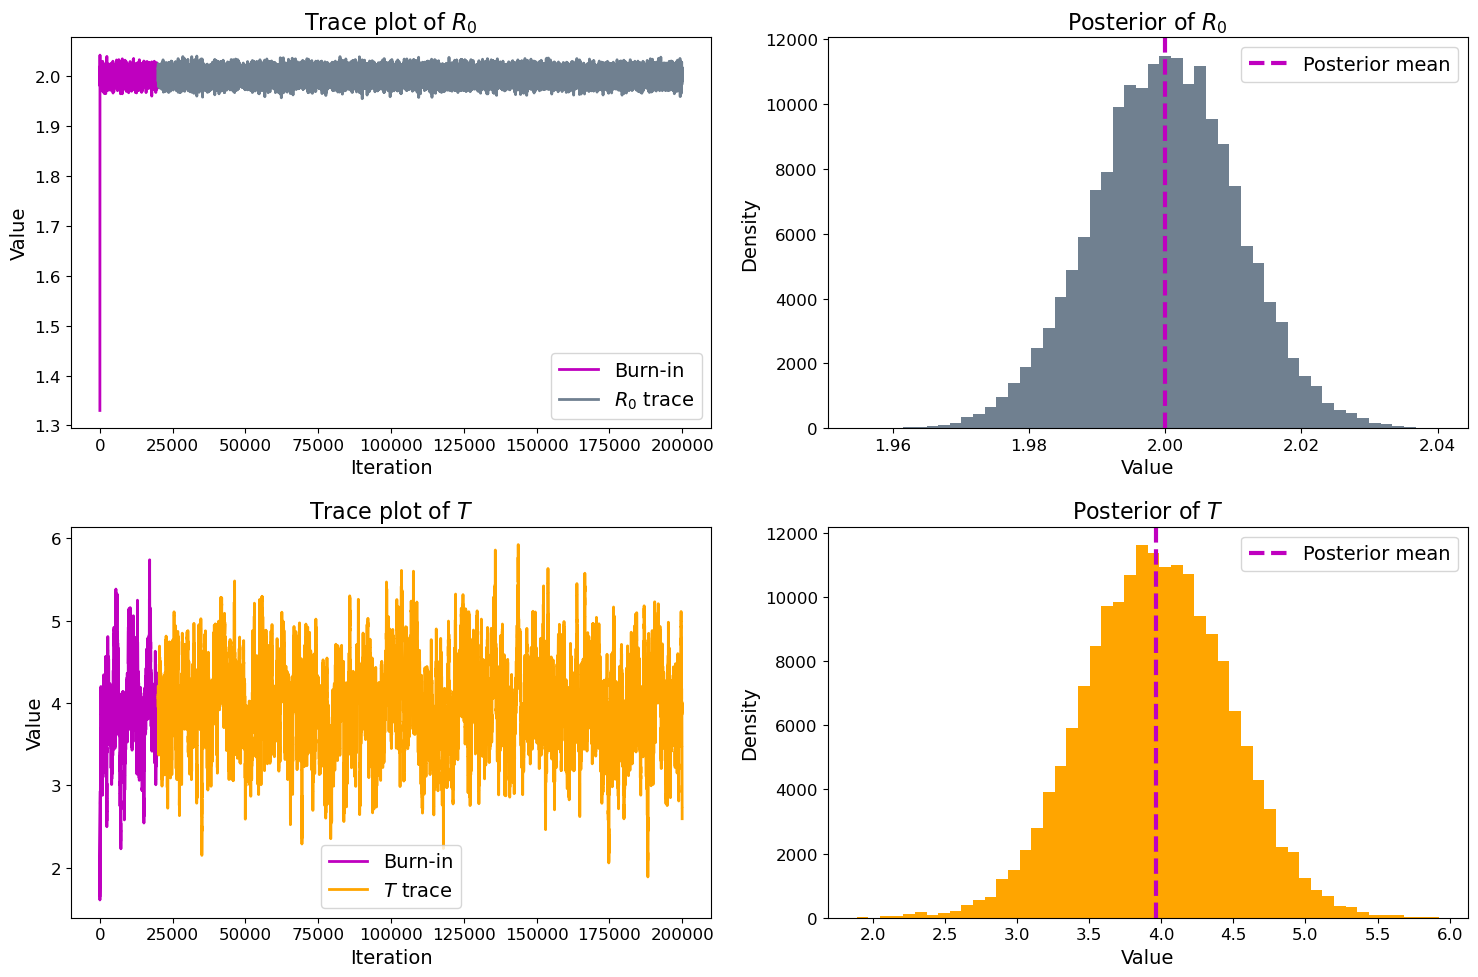

In [48]:
# calculates combined log-prior for given values of beta and T
def log_prior(R0, T):
    log_prior_R0 = expon.logpdf(R0, loc=0, scale=1000000)
    log_prior_T = truncnorm.logpdf(T,(a - T_true) / sigma_trunc,
                        (b - T_true) / sigma_trunc, loc=T_true, scale=sigma_trunc)
    log_prior = log_prior_R0 + log_prior_T
    return log_prior

def mcmc(tau_obs, R0_obs, n, S_init, I_init, R_init, n_iter, step_size_R0, step_size_T):
    # set initial values (cur stands for 'current value')
    R0_cur = 1.33
    T_cur = 1.66
    
    # initialise a counter for the number of accepted moves
    accept_count = 0
    
    # initialise arrays storing the traces for each parameter
    R0_trace, T_trace = [R0_cur], [T_cur]
    
    for i in range(n_iter):
        # draw from proposal distributions
        R0_prop = np.random.normal(R0_cur, step_size_R0)
        T_prop = np.random.normal(T_cur, step_size_T)
        
        # convert to betas and gammas
        gamma_prop = 1 / T_prop
        gamma_cur = 1 / T_cur
        
        beta_prop = R0_prop * gamma_prop
        beta_cur = R0_cur * gamma_cur
        
        # can skip this step as we already have R0_prop and R0_cur
#         # calculate R0 using the proposed parameters
#         R0_prop = beta_prop / gamma_prop
#         # calculate R0 using the current parameters
#         R0_cur = beta_cur / gamma_cur
        
        # calculate tau using the proposed parameters
        tau_prop = final_size(beta_prop, gamma_prop, S_init, I_init, R_init, t_values)
        # calculate tau using the current parameters
        tau_cur = final_size(beta_cur, gamma_cur, S_init, I_init, R_init, t_values)
        
        # calculate the log-prior using the proposed parameters
        log_prior_prop = log_prior(R0_prop, T_prop)
        # calculate the log-prior using the current parameters
        log_prior_cur = log_prior(R0_cur, T_cur)
        
        # using the simulated values found using proposed parameters, calculate the log-likelihood of observing our data
        log_like_prop = log_likelihood(tau_obs, tau_prop, n, R0_prop)
        # using the simulated values found using current parameters, calculate the log-likelihood of observing our data
        log_like_cur = log_likelihood(tau_obs, tau_cur, n, R0_cur)
        
        # calculate the log-posterior using the proposed parameters
        log_posterior_prop = log_prior_prop + log_like_prop
        # calculate the log-posterior using the current parameters
        log_posterior_cur = log_prior_cur + log_like_cur
        
        # if we accept the proposed move, update the parameters and +1 to the accept counter
        if np.random.rand() < np.exp(log_posterior_prop - log_posterior_cur):
            R0_cur, T_cur = R0_prop, T_prop
            accept_count += 1
        
        # add the current parameters to their traces
        R0_trace.append(R0_cur)
        T_trace.append(T_cur)
        
    # calculate the acceptance rate
    accept_rate = accept_count / n_iter
    
    return R0_trace, T_trace, accept_rate

# set initial conditions
S_init, I_init, R_init = 0.99, 0.01, 0

# set number of iterations
n_iter = 200000

# set burn-in period
burn_in = 20000

# set step sizes
step_size_R0 = 0.06
step_size_T = 0.1

# run the algorithm
R0_trace, T_trace, accept_rate = mcmc(tau_obs, R0_obs, n,
                S_init, I_init, R_init, n_iter, step_size_R0, step_size_T)

# apply burn-in
R0_trace_burn_in = R0_trace[:burn_in]
R0_trace_post_burn_in = R0_trace[burn_in:]

T_trace_burn_in = T_trace[:burn_in]
T_trace_post_burn_in = T_trace[burn_in:]

# print acceptance rate
print("Acceptance rate:", accept_rate)

# print means
R0_mean = np.mean(R0_trace_post_burn_in)
print(f"R0 mean: {R0_mean}")
T_mean = np.mean(T_trace_post_burn_in)
print(f"T mean: {T_mean}")


# plotting results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(range(burn_in), R0_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), R0_trace_post_burn_in, 'slategrey', label=r'$R_0$ trace')
plt.title(r'Trace plot of $R_0$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(R0_trace_post_burn_in, bins=50, color='slategrey')
plt.axvline(x=R0_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $R_0$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(burn_in), T_trace_burn_in, 'm', label='Burn-in')
plt.plot(range(burn_in, n_iter+1), T_trace_post_burn_in, 'orange', label=r'$T$ trace')
plt.title(r'Trace plot of $T$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(T_trace_post_burn_in, bins=50, color='orange')
plt.axvline(x=T_mean, color='m', linestyle = '--', linewidth = 3, label = 'Posterior mean')
plt.title(r'Posterior of $T$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig("Figures/finalsize_R0T_informative_traces.pdf", dpi=1000, bbox_inches='tight')

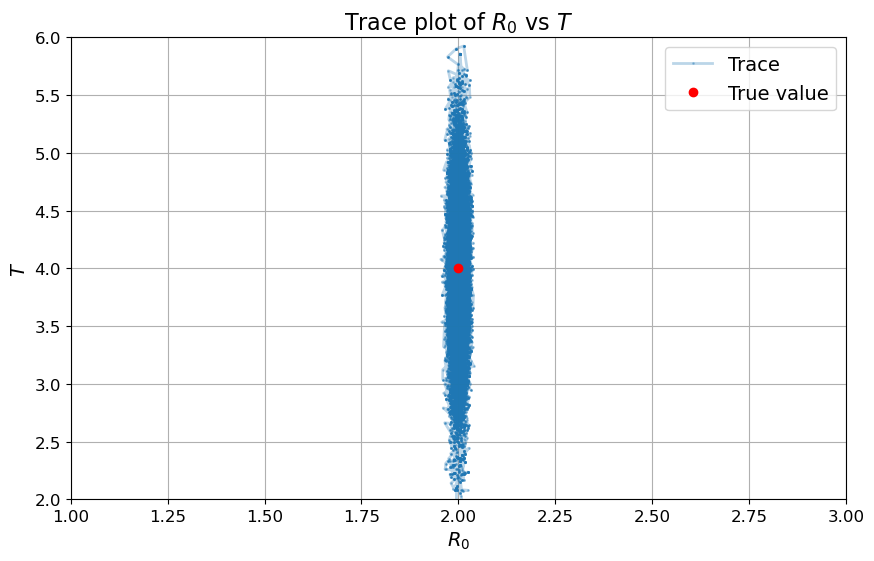

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(R0_trace_post_burn_in, T_trace_post_burn_in, 'o-', markersize=1, alpha = 0.3, label = 'Trace')
plt.plot(R0_true,T_true,'ro', label = r'True value') 
plt.xlabel(r'$R_0$')
plt.ylabel(r'$T$')
plt.xlim(1,3)
plt.ylim(2,6)
plt.title(r'Trace plot of $R_0$ vs $T$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/finalsize_R0T_uninformative_traceplot.pdf", dpi=1000, bbox_inches='tight')

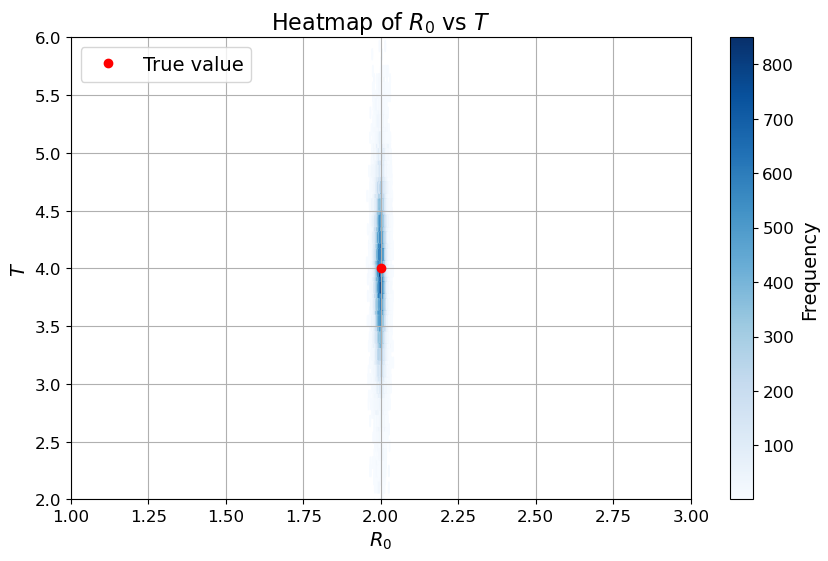

In [50]:
plt.figure(figsize=(10, 6))
plt.hexbin(R0_trace_post_burn_in, T_trace_post_burn_in, gridsize=50, cmap = 'Blues', mincnt=1)
plt.colorbar(label='Frequency')
plt.plot(R0_true,T_true,'ro', label = r'True value') 
plt.xlabel(r'$R_0$')
plt.ylabel(r'$T$')
plt.xlim(1,3)
plt.ylim(2,6)
plt.title(r'Heatmap of $R_0$ vs $T$')
plt.legend()
plt.grid(True)
plt.savefig("Figures/finalsize_R0T_informative_heatmap.pdf", dpi=1000, bbox_inches='tight')